In [305]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [306]:
smmh = pd.read_csv('smmh.csv')
smmh.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [307]:
new_column_names = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'frequency_social_media_distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

smmh = smmh.rename(columns=new_column_names)
smmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   timestamp                           481 non-null    object 
 1   age                                 481 non-null    float64
 2   gender                              481 non-null    object 
 3   relationship_status                 481 non-null    object 
 4   occupation_status                   481 non-null    object 
 5   affiliated_organizations            451 non-null    object 
 6   use_social_media                    481 non-null    object 
 7   social_media_platforms              481 non-null    object 
 8   daily_social_media_time             481 non-null    object 
 9   frequency_social_media_no_purpose   481 non-null    int64  
 10  frequency_social_media_distracted   481 non-null    int64  
 11  restless_without_social_media       481 non-n

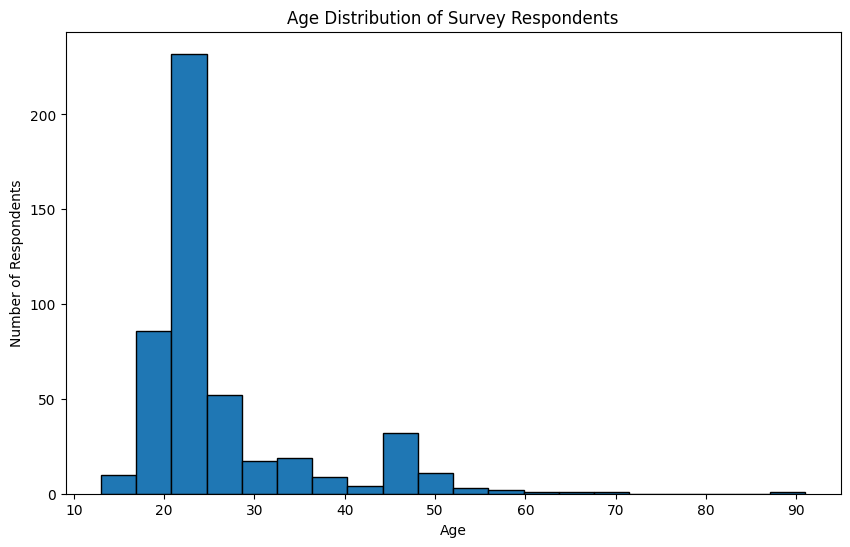

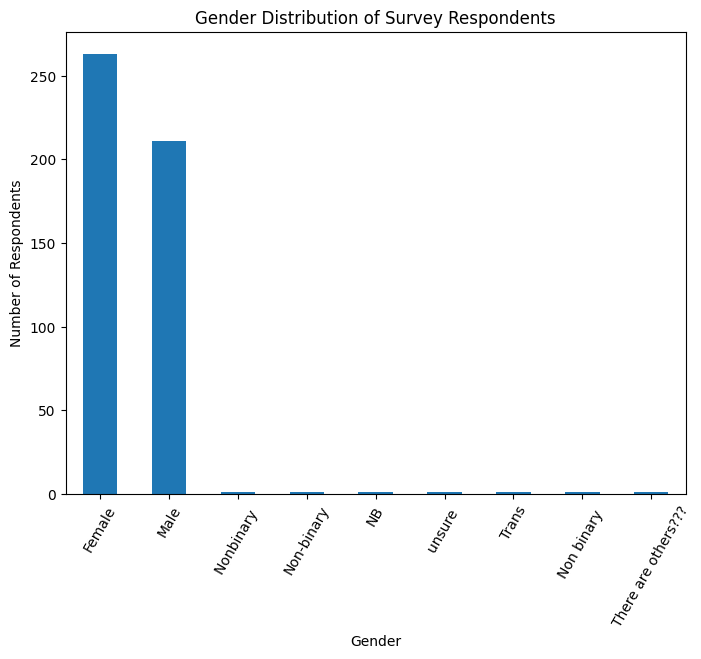

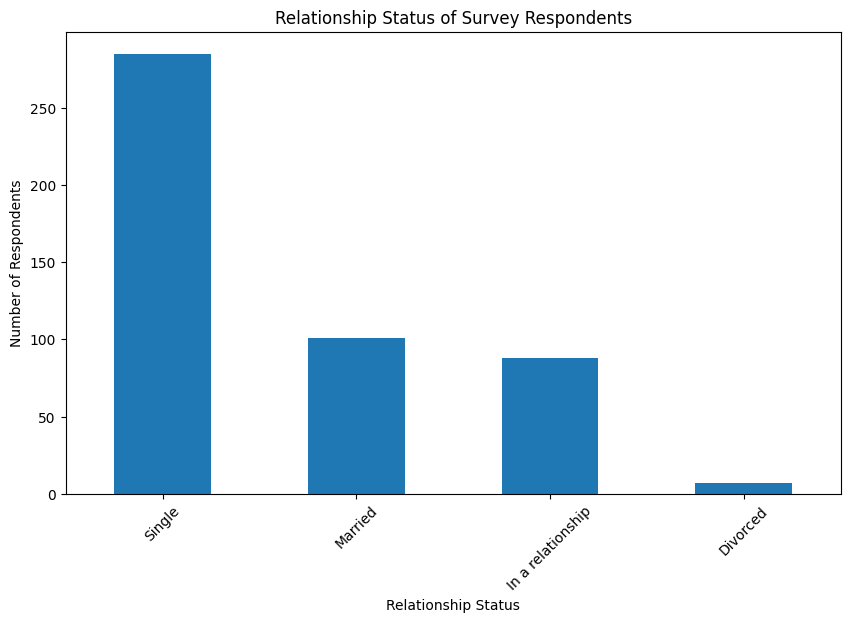

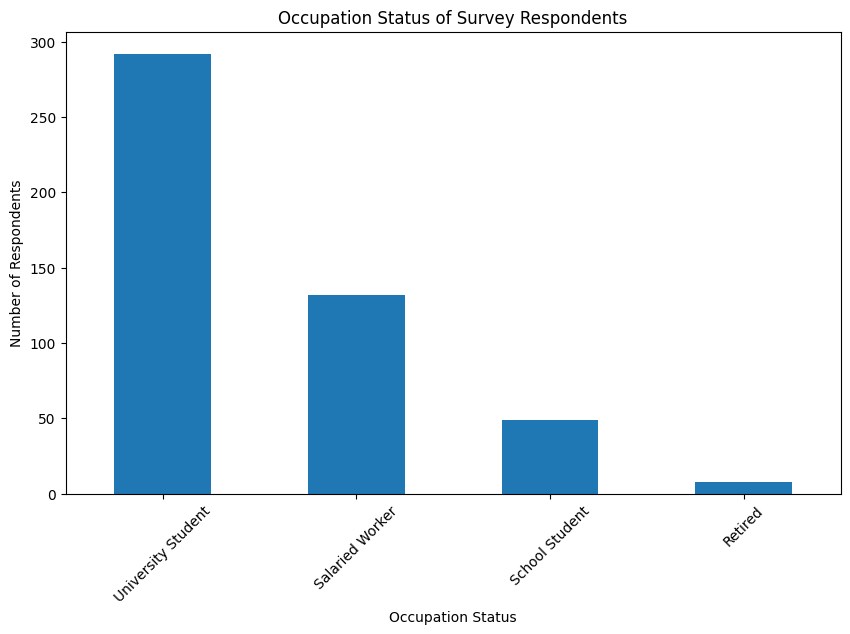

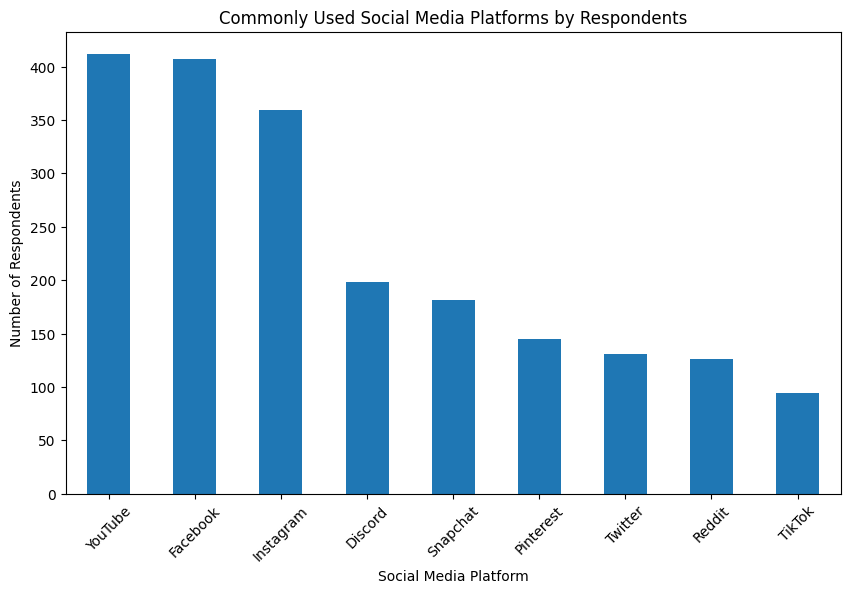

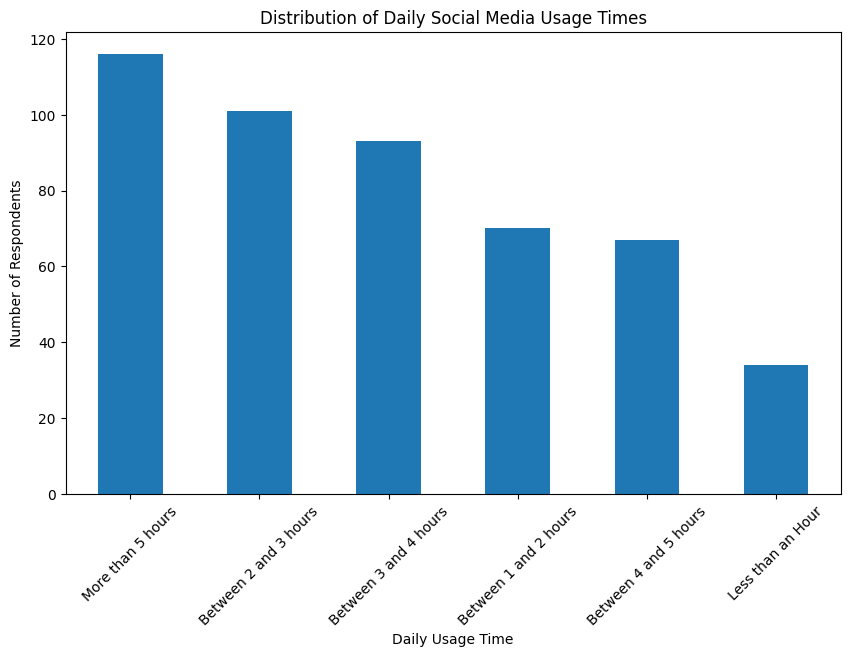

In [308]:
average_age = smmh['age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(smmh['age'], bins=20, edgecolor='k')
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

gender_distribution = smmh['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution of Survey Respondents')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=60)
plt.show()

relationship_statuses = smmh['relationship_status'].value_counts()

plt.figure(figsize=(10, 6))
relationship_statuses.plot(kind='bar')
plt.title('Relationship Status of Survey Respondents')
plt.xlabel('Relationship Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

occupation_statuses = smmh['occupation_status'].value_counts()

plt.figure(figsize=(10, 6))
occupation_statuses.plot(kind='bar')
plt.title('Occupation Status of Survey Respondents')
plt.xlabel('Occupation Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

social_media_platforms = smmh['social_media_platforms'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
social_media_platforms.plot(kind='bar')
plt.title('Commonly Used Social Media Platforms by Respondents')
plt.xlabel('Social Media Platform')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

daily_usage_distribution = smmh['daily_social_media_time'].value_counts()

plt.figure(figsize=(10, 6))
daily_usage_distribution.plot(kind='bar')
plt.title('Distribution of Daily Social Media Usage Times')
plt.xlabel('Daily Usage Time')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

In [309]:
# Drop timestamp column
smmh.drop(columns=['timestamp'], inplace=True)

In [310]:
# Remove whitespace from column names and values
smmh.columns = smmh.columns.str.strip()
for col in smmh.select_dtypes(include=['object']).columns:
		smmh[col] = smmh[col].str.strip()

In [311]:
# standardize gender entries

# combine Nonbinary, Non-binary, NB, and Non binary into one
smmh = smmh.replace(
    {
        "gender": {
            "Nonbinary": "Non-binary",
            "NB": "Non-binary",
            "Non binary": "Non-binary",
        }
    }
)

# remove "There are others???" and "unsure" entries from gender
smmh = smmh[(smmh["gender"] != "There are others???") & (smmh["gender"] != "unsure")]

# check unique gender entries
smmh["gender"].unique()

array(['Male', 'Female', 'Non-binary', 'Trans'], dtype=object)

In [312]:
# Standardize frequency and scales

# Reverse feelings_about_comparisons: original 1-5 where 1=feel bad, 5=feel good
smmh['feelings_about_comparisons'] = 5 - (smmh['feelings_about_comparisons'])

# Change the range from 1-5 to 0-4
smmh['frequency_social_media_no_purpose'] = smmh['frequency_social_media_no_purpose'] - 1
smmh['frequency_social_media_distracted'] = smmh['frequency_social_media_distracted'] - 1
smmh['restless_without_social_media'] = smmh['restless_without_social_media'] - 1
smmh['distractibility_scale'] = smmh['distractibility_scale'] - 1
smmh['worry_level_scale'] = smmh['worry_level_scale'] - 1
smmh['difficulty_concentrating'] = smmh['difficulty_concentrating'] - 1
smmh['compare_to_successful_people_scale'] = smmh['compare_to_successful_people_scale'] - 1
smmh['feelings_about_comparisons'] = smmh['feelings_about_comparisons'] - 1
smmh['frequency_seeking_validation'] = smmh['frequency_seeking_validation'] - 1
smmh['frequency_feeling_depressed'] = smmh['frequency_feeling_depressed'] - 1
smmh['interest_fluctuation_scale'] = smmh['interest_fluctuation_scale'] - 1
smmh['sleep_issues_scale'] = smmh['sleep_issues_scale'] - 1

In [313]:
# Handle missing values
smmh = smmh.dropna()

# Handle duplicate entries
smmh = smmh.drop_duplicates()

In [314]:
# Split social_media_platforms string by ", " to one-hot encoding, then remove original column
social_media_dummies = smmh['social_media_platforms'].str.get_dummies(sep=', ')
smmh = smmh.join(social_media_dummies)

# Create social_media_platform_count: count how many platforms each user uses
# smmh['social_media_platform_count'] = social_media_dummies.sum(axis=1)

# Remove original column
smmh = smmh.drop(columns=['social_media_platforms'])

# Split affiliated_organizations string by ", " to one-hot encoding but remove "N/A" string, then remove original column
affiliated_org_dummies = smmh['affiliated_organizations'].str.get_dummies(sep=', ')
if 'N/A' in affiliated_org_dummies.columns:
    affiliated_org_dummies = affiliated_org_dummies.drop(columns=['N/A'])
smmh = smmh.join(affiliated_org_dummies)
smmh = smmh.drop(columns=['affiliated_organizations'])

# Convert the occupation_status column to one-hot encoding, but map University Student to University and School Student to School first
smmh['occupation_status'] = smmh['occupation_status'].replace({'University Student': 'University', 'School Student': 'School'})
occupation_status_dummies = smmh['occupation_status'].str.get_dummies()
smmh = smmh.join(occupation_status_dummies, rsuffix='_new')
# Overwrite overlapping columns (School, University) with new values
for col in ['School', 'University']:
	if f'{col}_new' in smmh.columns:
		smmh[col] = smmh[f'{col}_new']
		smmh = smmh.drop(columns=[f'{col}_new'])
smmh = smmh.drop(columns=['occupation_status'])

# # Convert the gender column to one-hot encoding
# gender_dummies = smmh['gender'].str.get_dummies()
# smmh = smmh.join(gender_dummies)
# smmh = smmh.drop(columns=['gender'])

# # Convert the relationship_status column to one-hot encoding
# relationship_status_dummies = smmh['relationship_status'].str.get_dummies()
# smmh = smmh.join(relationship_status_dummies)
# smmh = smmh.drop(columns=['relationship_status'])

# map daily_social_media_time according to this: 
# ['Between 2 and 3 hours' 'More than 5 hours' 'Between 3 and 4 hours'
#  'Less than an Hour' 'Between 1 and 2 hours' 'Between 4 and 5 hours']
time_mapping = {
		'Less than an Hour': 0,
		'Between 1 and 2 hours': 1,
		'Between 2 and 3 hours': 2,
		'Between 3 and 4 hours': 3,
		'Between 4 and 5 hours': 4,
		'More than 5 hours': 5
}

# Apply the mapping to the column, make into integer type
smmh['daily_social_media_time'] = smmh['daily_social_media_time'].map(time_mapping).astype(int)

# map "use_social_media" column: Yes -> 1, No -> 0
smmh['use_social_media'] = smmh['use_social_media'].map({'Yes': 1, 'No': 0})

In [315]:
# Create reverse mappings to convert back to original labels
reverse_time_mapping = {v: k for k, v in time_mapping.items()}

print("Reverse time mapping created:")
for key, value in reverse_time_mapping.items():
    print(f"  {key} -> {value}")

Reverse time mapping created:
  0 -> Less than an Hour
  1 -> Between 1 and 2 hours
  2 -> Between 2 and 3 hours
  3 -> Between 3 and 4 hours
  4 -> Between 4 and 5 hours
  5 -> More than 5 hours


In [316]:
# Utility function to get original values from scaled data
def get_original_values(scaled_df, scaler, numerical_cols):
    """
    Convert scaled numerical values back to their original scale,
    then map them back to original labels if applicable.
    
    Parameters:
    - scaled_df: DataFrame with scaled values
    - scaler: The StandardScaler used for scaling
    - numerical_cols: List of numerical column names that were scaled
    
    Returns:
    - DataFrame with original values
    """
    original_df = scaled_df.copy()
    
    # Inverse transform the numerical columns
    if len(numerical_cols) > 0 and hasattr(scaler, 'inverse_transform'):
        original_values = scaler.inverse_transform(original_df[numerical_cols])
        original_df[numerical_cols] = original_values
    
    # Map daily_social_media_time back to original labels if present
    if 'daily_social_media_time' in original_df.columns:
        # Round to nearest integer first (since it was mapped to 0-5)
        original_df['daily_social_media_time'] = original_df['daily_social_media_time'].round().astype(int)
        # Clip to valid range
        original_df['daily_social_media_time'] = original_df['daily_social_media_time'].clip(0, 5)
        # Map to original labels
        original_df['daily_social_media_time_label'] = original_df['daily_social_media_time'].map(reverse_time_mapping)
    
    return original_df

print("Utility function created for reverse transformations")

Utility function created for reverse transformations


In [317]:
le = LabelEncoder()

# Encode categorical variables
categorical_columns = [
  # "gender",
	# "relationship_status",
]

# Manually encode gender with specific mapping, removed Non-binary
# since it doesn't provide enough context.
smmh = smmh[smmh['gender'] != 'Non-binary']
gender_mapping = {"Male": 0, "Female": 1}
smmh['gender'] = smmh['gender'].map(gender_mapping)

# Manually encode relationship_status 
relationship_mapping = {
	"Married": 0,
	"Divorced": 1,
	"In a relationship": 2,
	"Single": 3
}
smmh['relationship_status'] = smmh['relationship_status'].map(relationship_mapping)

for col in categorical_columns:
		smmh[col] = le.fit_transform(smmh[col])

# age as integer
smmh['age'] = smmh['age'].astype(int)

smmh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 480
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   age                                 446 non-null    int64
 1   gender                              446 non-null    int64
 2   relationship_status                 446 non-null    int64
 3   use_social_media                    446 non-null    int64
 4   daily_social_media_time             446 non-null    int64
 5   frequency_social_media_no_purpose   446 non-null    int64
 6   frequency_social_media_distracted   446 non-null    int64
 7   restless_without_social_media       446 non-null    int64
 8   distractibility_scale               446 non-null    int64
 9   worry_level_scale                   446 non-null    int64
 10  difficulty_concentrating            446 non-null    int64
 11  compare_to_successful_people_scale  446 non-null    int64
 12  feelings_abou

<Figure size 800x600 with 0 Axes>

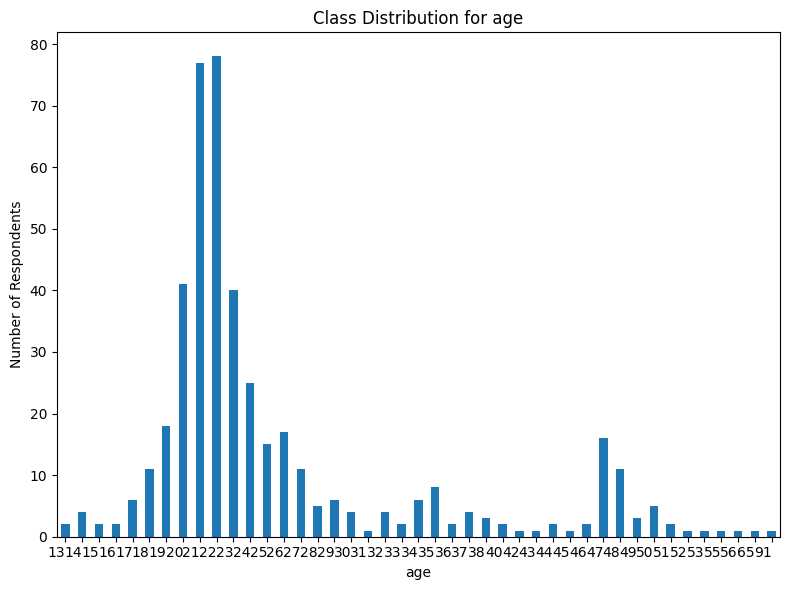

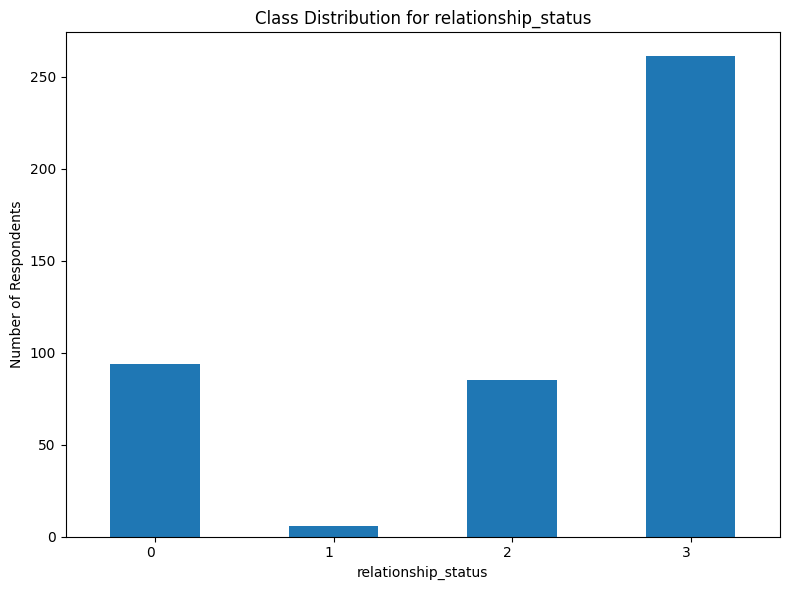

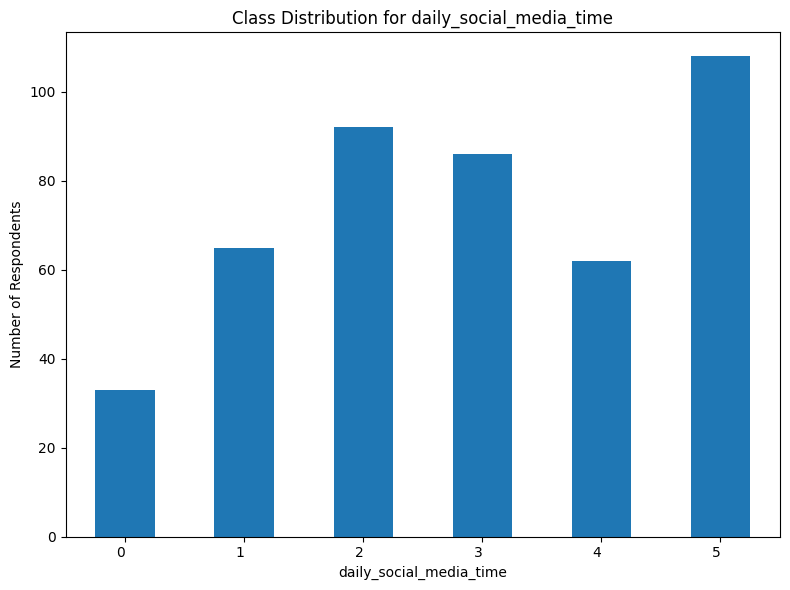

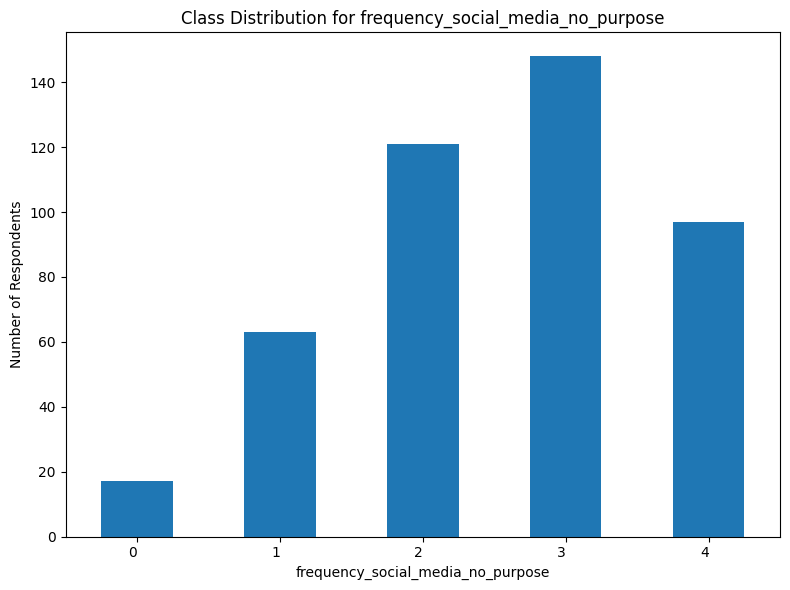

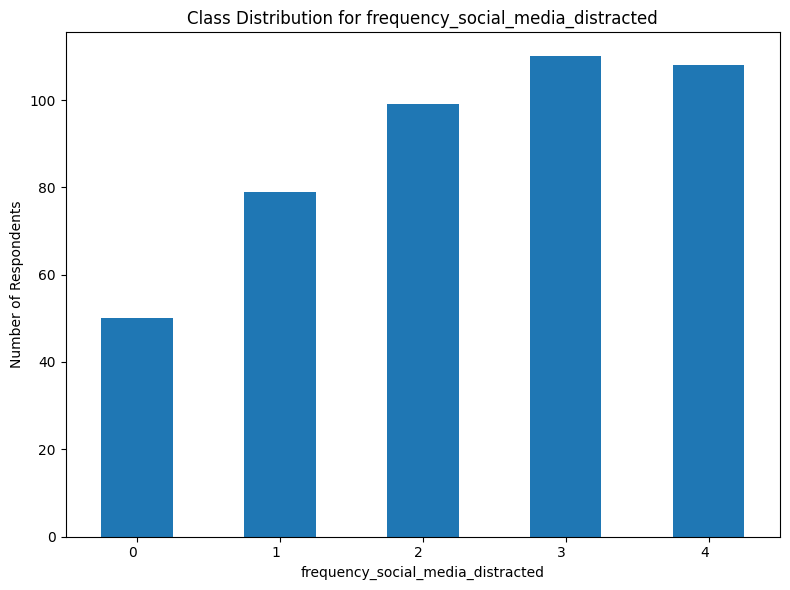

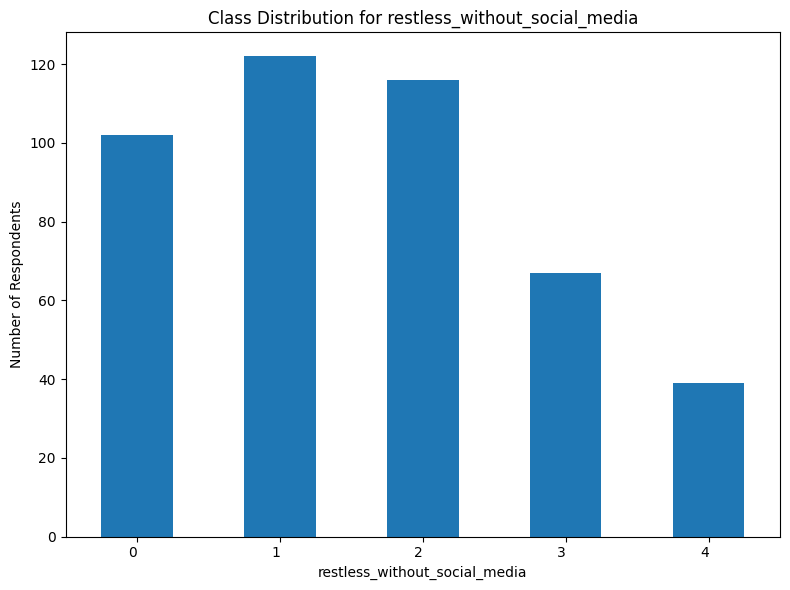

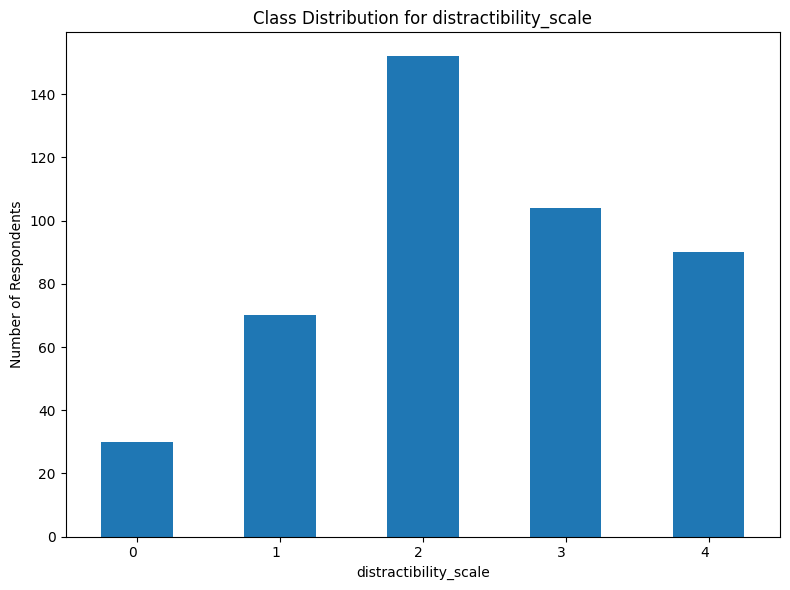

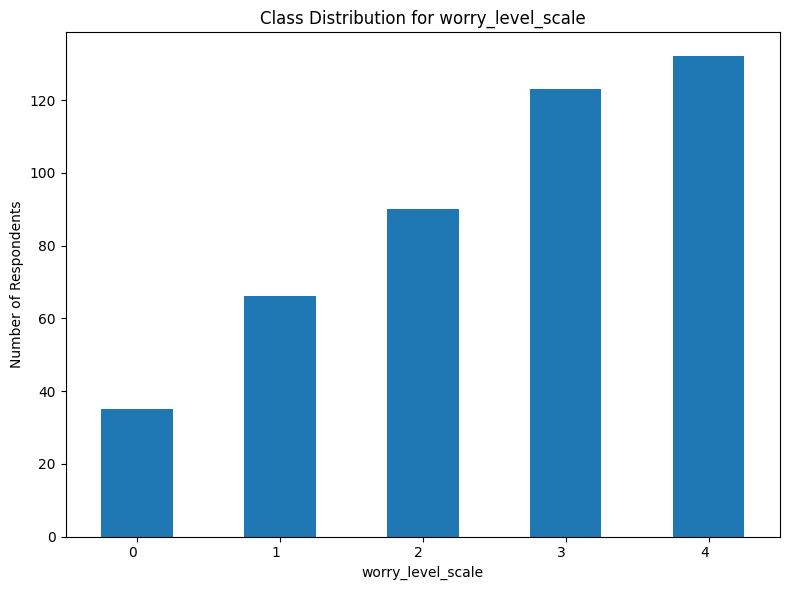

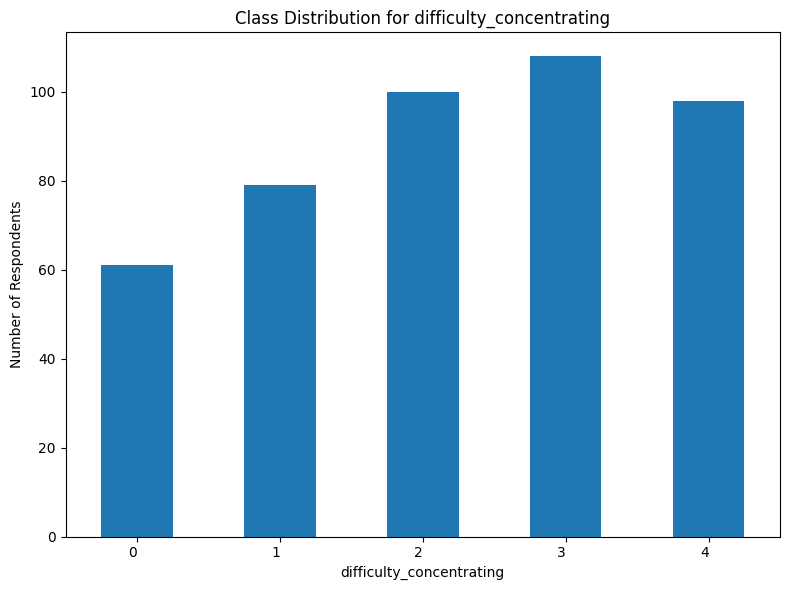

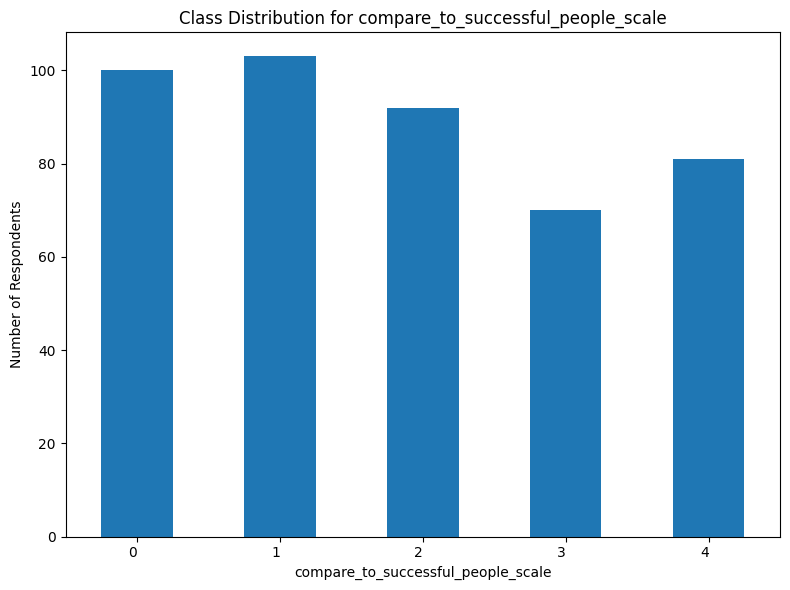

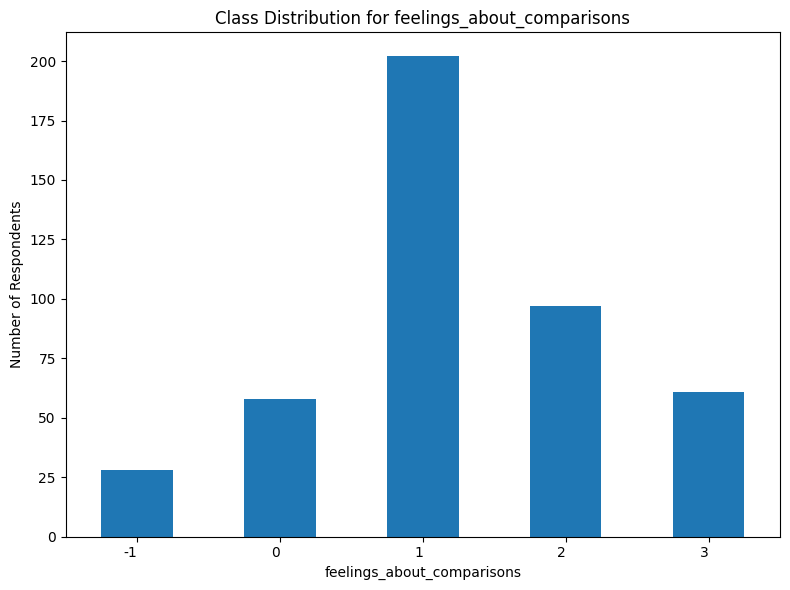

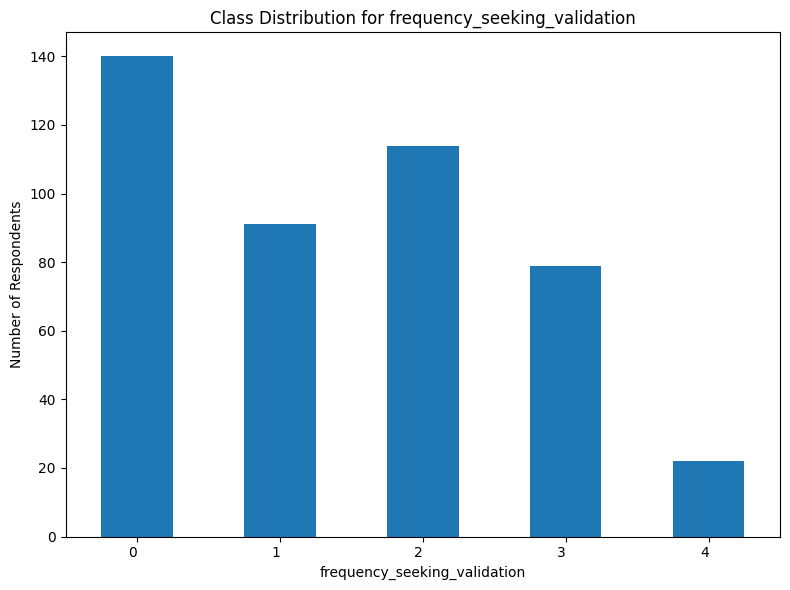

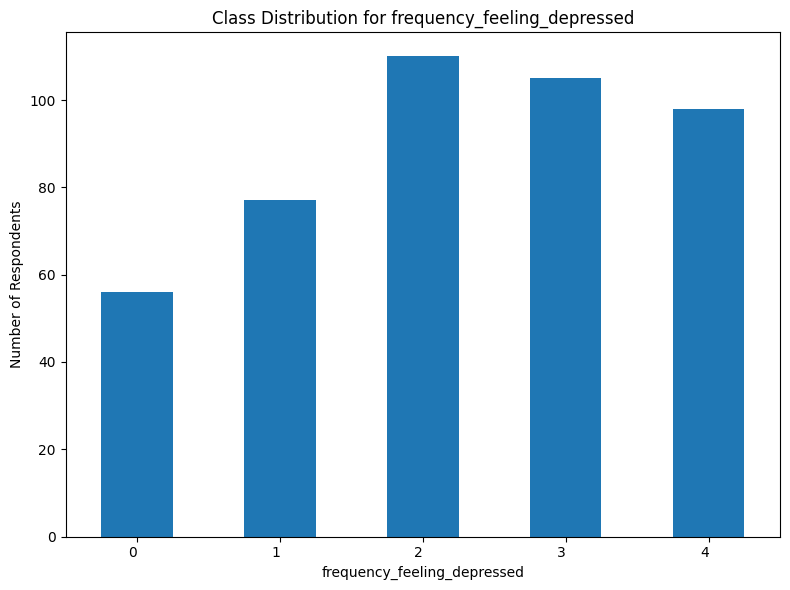

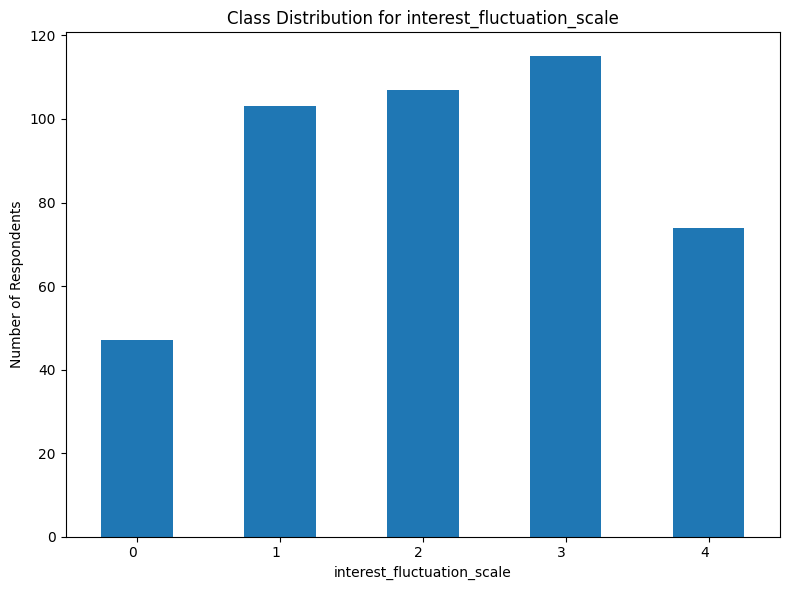

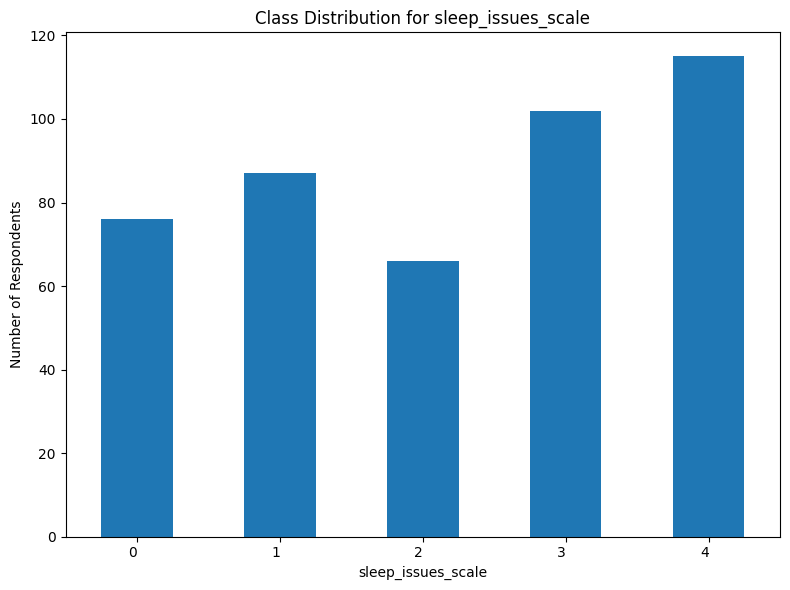

In [318]:
# Check all classes for imbalance
plt.figure(figsize=(8, 6))
for col in smmh.select_dtypes(include=['object', 'int', 'float']).columns:
	counts = smmh[col].value_counts().sort_index()
	if len(counts) > 2:  # only plot if more than 2 values
		plt.figure(figsize=(8, 6))
		counts.plot(kind='bar', title=f'Class Distribution for {col}')
		plt.xlabel(col)
		plt.ylabel('Number of Respondents')
		plt.xticks(rotation=0, ha='right')
		plt.tight_layout()
		plt.show()

In [319]:
# Calculate the label mental_health_severity

adhd_severity = (
	smmh['frequency_social_media_no_purpose'] +
	smmh['frequency_social_media_distracted'] +
	smmh['distractibility_scale'] +
	smmh['difficulty_concentrating']
) / 4

anxiety_severity = (
	smmh['restless_without_social_media'] +
	smmh['worry_level_scale']
) / 2

self_esteem_severity = (
	smmh['compare_to_successful_people_scale'] +
	smmh['feelings_about_comparisons'] +
	smmh['frequency_seeking_validation']
) / 3

depression_severity = (
	smmh['frequency_feeling_depressed'] +
	smmh['interest_fluctuation_scale'] +
	smmh['sleep_issues_scale']
) / 3

smmh['mental_health_severity'] = (
	adhd_severity +
	anxiety_severity +
	self_esteem_severity +
	depression_severity
)

# Drop individual severity components

smmh = smmh.drop(columns=[
	'frequency_social_media_no_purpose',
	'frequency_social_media_distracted',
	'distractibility_scale',
	'difficulty_concentrating',
	'restless_without_social_media',
	'worry_level_scale',
	'compare_to_successful_people_scale',
	'feelings_about_comparisons',
	'frequency_seeking_validation',
	'frequency_feeling_depressed',
	'interest_fluctuation_scale',
	'sleep_issues_scale'
])

In [320]:
# Scale numerical features for preprocessing
# Store this scaler separately to avoid overwriting in clustering section
scaler_preprocessing = StandardScaler()
numerical_columns = ['age', 'daily_social_media_time']
smmh[numerical_columns] = scaler_preprocessing.fit_transform(smmh[numerical_columns])

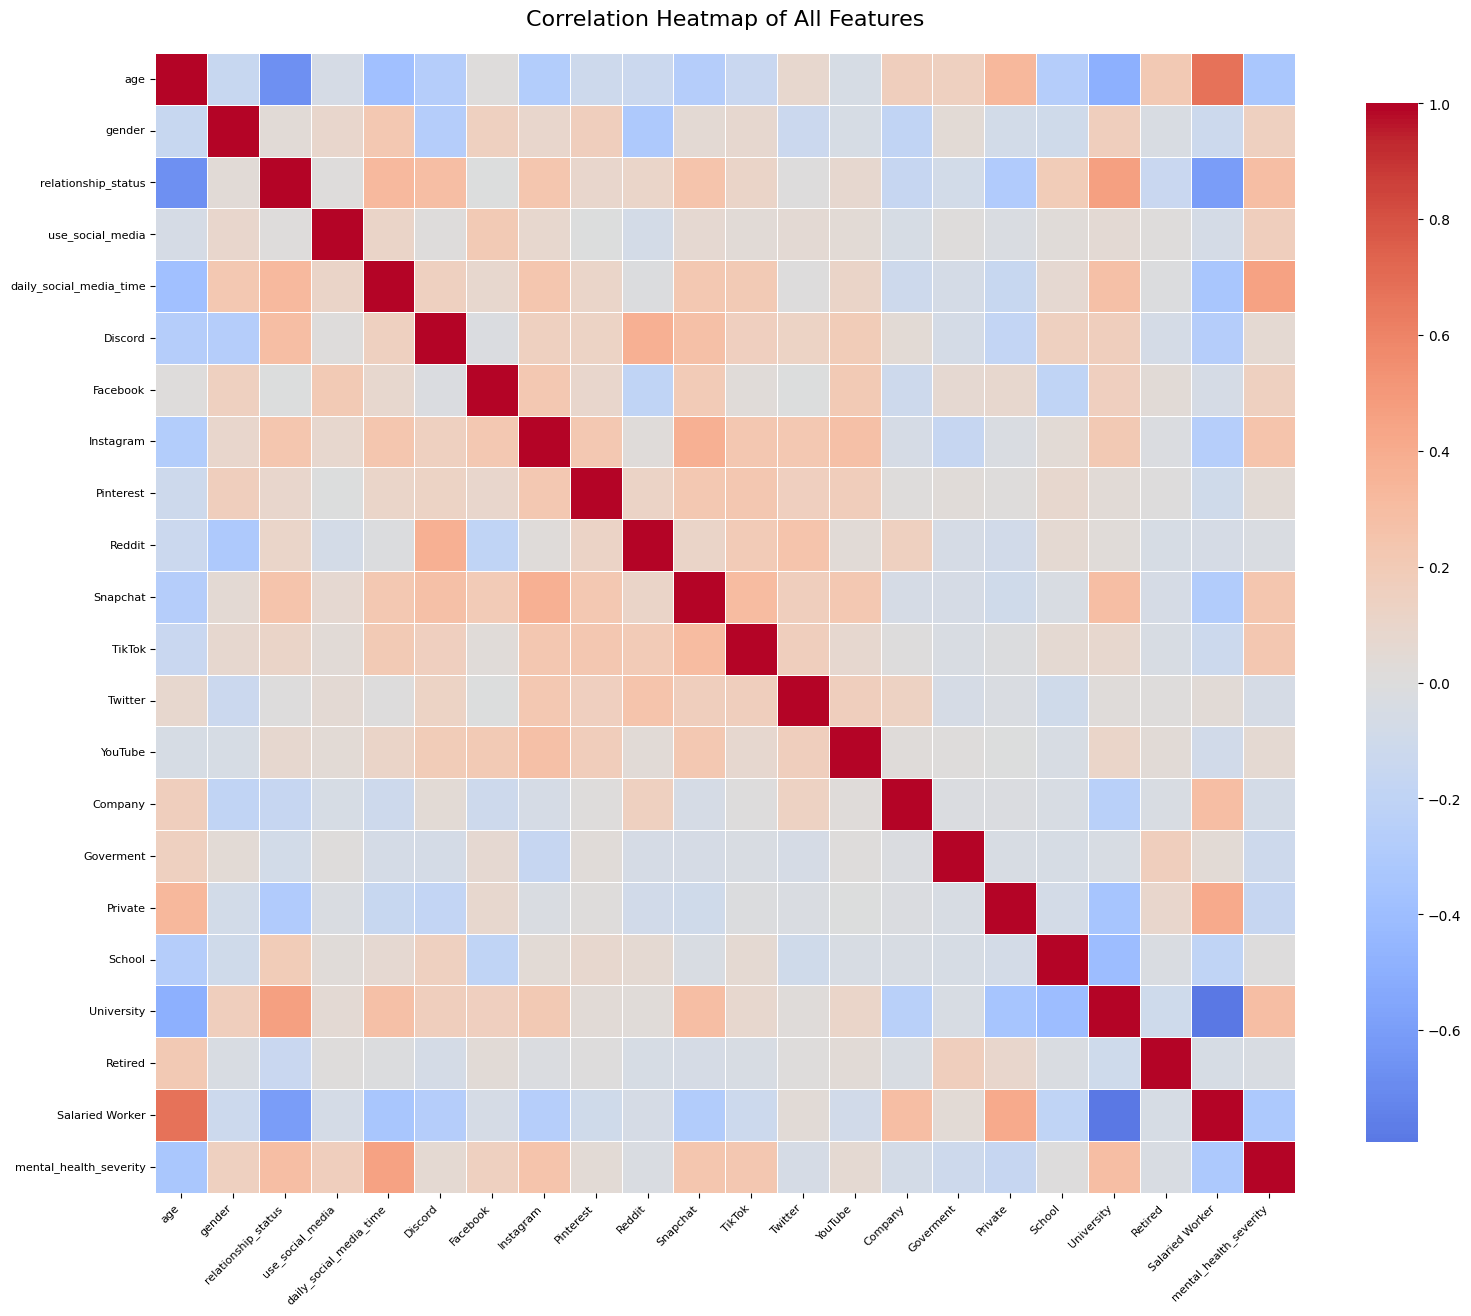


Strong Correlations:

Correlations with Mental Health Severity:
daily_social_media_time    0.455867
University                 0.296744
relationship_status        0.288331
Instagram                  0.254721
Snapchat                   0.241923
TikTok                     0.229888
use_social_media           0.168846
Facebook                   0.150338
gender                     0.148355
YouTube                    0.057769
Discord                    0.054450
Pinterest                  0.044170
School                     0.002658
Reddit                    -0.023864
Retired                   -0.034194
Twitter                   -0.051380
Company                   -0.072305
Goverment                 -0.113873
Private                   -0.158891
Salaried Worker           -0.317224
age                       -0.330070
Name: mental_health_severity, dtype: float64


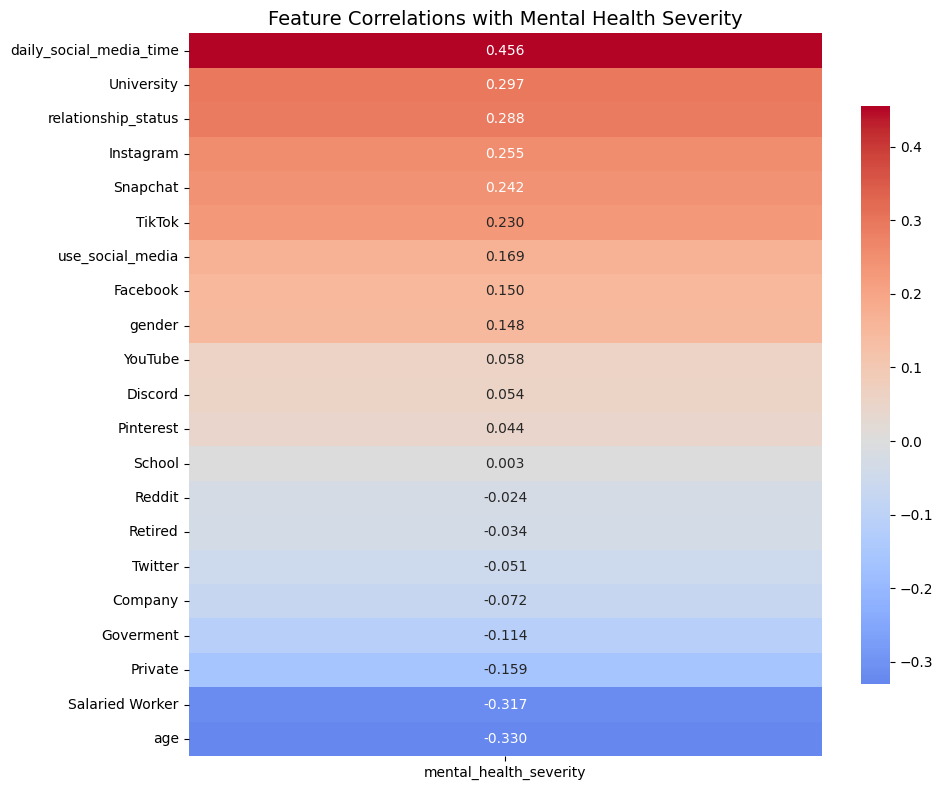

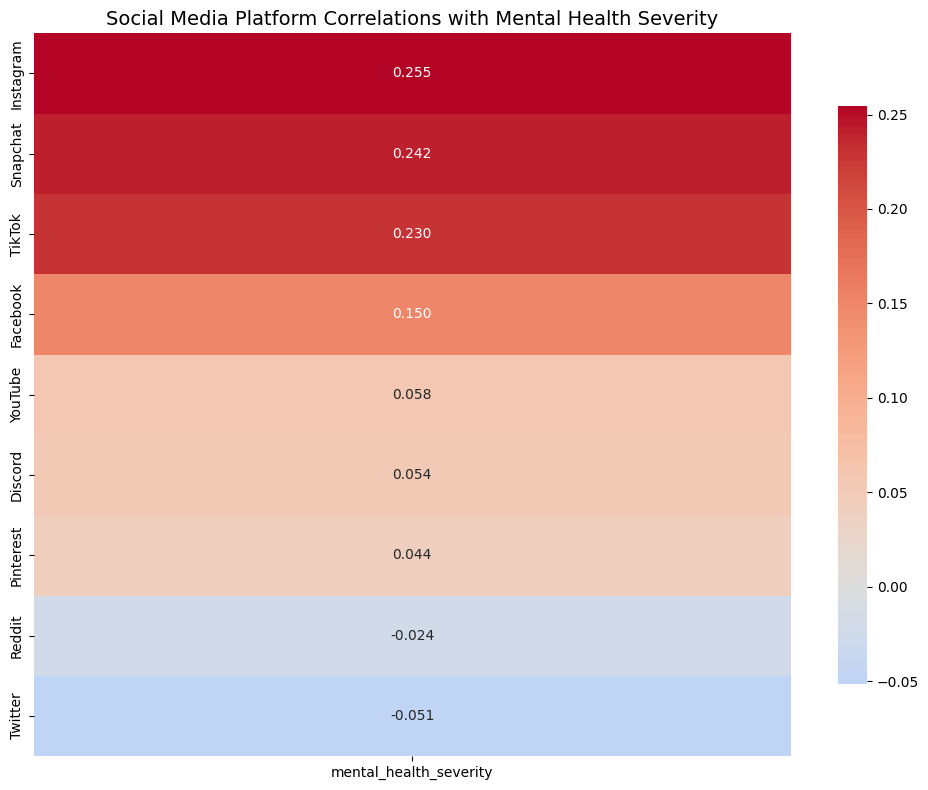


Social Media Platform Correlations with Mental Health Severity:
Instagram    0.254721
Snapchat     0.241923
TikTok       0.229888
Facebook     0.150338
YouTube      0.057769
Discord      0.054450
Pinterest    0.044170
Reddit      -0.023864
Twitter     -0.051380
Name: mental_health_severity, dtype: float64


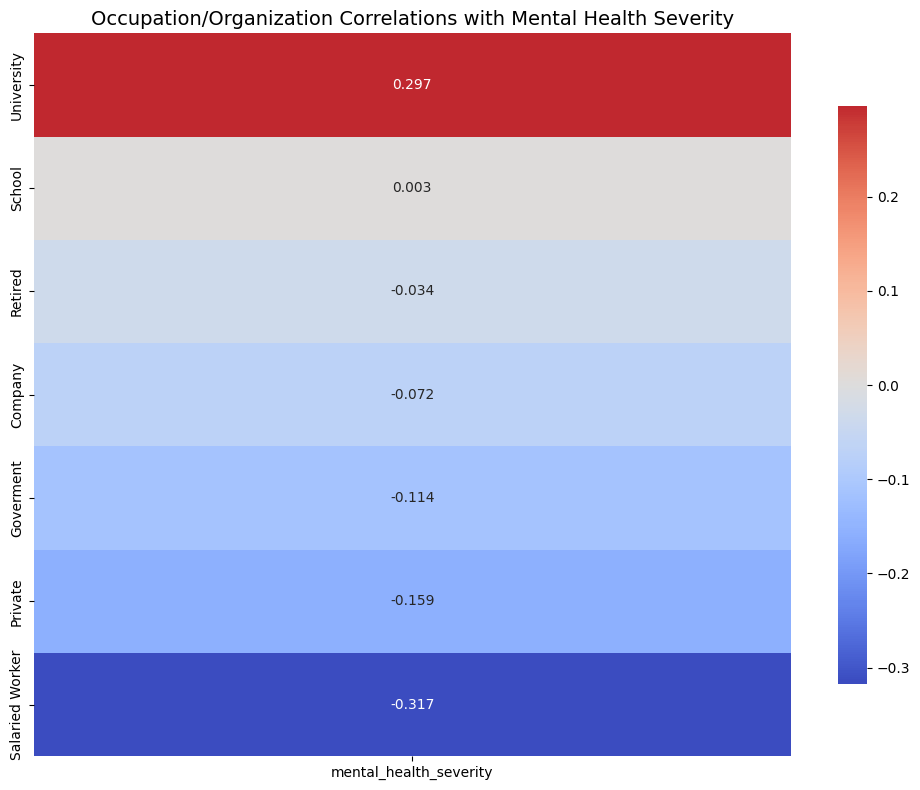


Occupation/Organization Correlations with Mental Health Severity:
University         0.296744
School             0.002658
Retired           -0.034194
Company           -0.072305
Goverment         -0.113873
Private           -0.158891
Salaried Worker   -0.317224
Name: mental_health_severity, dtype: float64


In [321]:
# Correlation heatmap

# Calculate correlation matrix
corr_matrix = smmh.corr()

# Create a larger figure for better visibility
plt.figure(figsize=(16, 14))

# Create heatmap with smaller font and without annotations for clarity
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    xticklabels=True,
    yticklabels=True,
)

plt.title("Correlation Heatmap of All Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Alternative: Show only strong correlations (absolute value > 0.3)
print("\nStrong Correlations:")
print("=" * 60)

# Get correlation with mental_health_severity
mh_correlations = (
    corr_matrix["mental_health_severity"]
    .drop("mental_health_severity")
    .sort_values(ascending=False)
)
print("\nCorrelations with Mental Health Severity:")
print(mh_correlations)

# Create a focused heatmap on mental_health_severity
plt.figure(figsize=(10, 8))
mh_corr_df = mh_correlations.to_frame()
sns.heatmap(
    mh_corr_df,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Feature Correlations with Mental Health Severity", fontsize=14)
plt.tight_layout()
plt.show()

# Get focused heatmap on mental_health_severity with social media platforms
platform_columns = [
    "Facebook",
    "Instagram",
    "Twitter",
    "Snapchat",
    "TikTok",
    "Discord",
    "Pinterest",
    "Reddit",
    "YouTube",
]
# Get correlations between platforms and mental_health_severity
platform_corrs = smmh[platform_columns + ["mental_health_severity"]].corr()

# Extract just the correlations with mental_health_severity for platforms
platform_correlations = platform_corrs["mental_health_severity"][
    platform_columns
].sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(10, 8))
platform_correlations_df = platform_correlations.to_frame()
sns.heatmap(
    platform_correlations_df,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Social Media Platform Correlations with Mental Health Severity", fontsize=14)
plt.tight_layout()
plt.show()

print("\nSocial Media Platform Correlations with Mental Health Severity:")
print(platform_correlations)

# Get focused heatmap on mental_health_severity with occupation/organization
occupation_columns = [
    "Company",
    "Goverment",
    "Private",
    "School",
    "University",
    "Retired",
    "Salaried Worker",
]

# Get correlations between occupations and mental_health_severity
occupation_corrs = smmh[occupation_columns + ["mental_health_severity"]].corr()

# Extract just the correlations with mental_health_severity for occupations
occupation_correlations = occupation_corrs["mental_health_severity"][
    occupation_columns
].sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(10, 8))
occupation_correlations_df = occupation_correlations.to_frame()
sns.heatmap(
    occupation_correlations_df,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
)
plt.title(
    "Occupation/Organization Correlations with Mental Health Severity", fontsize=14
)
plt.tight_layout()
plt.show()

print("\nOccupation/Organization Correlations with Mental Health Severity:")
print(occupation_correlations)

In [322]:
# Select features based on correlation map values > 0.3 or < -0.3 with mental_health_severity
selected_features = mh_correlations[
		(mh_correlations.abs() > 0.15)
	].index.tolist()

smmh = smmh[selected_features + ['mental_health_severity']]

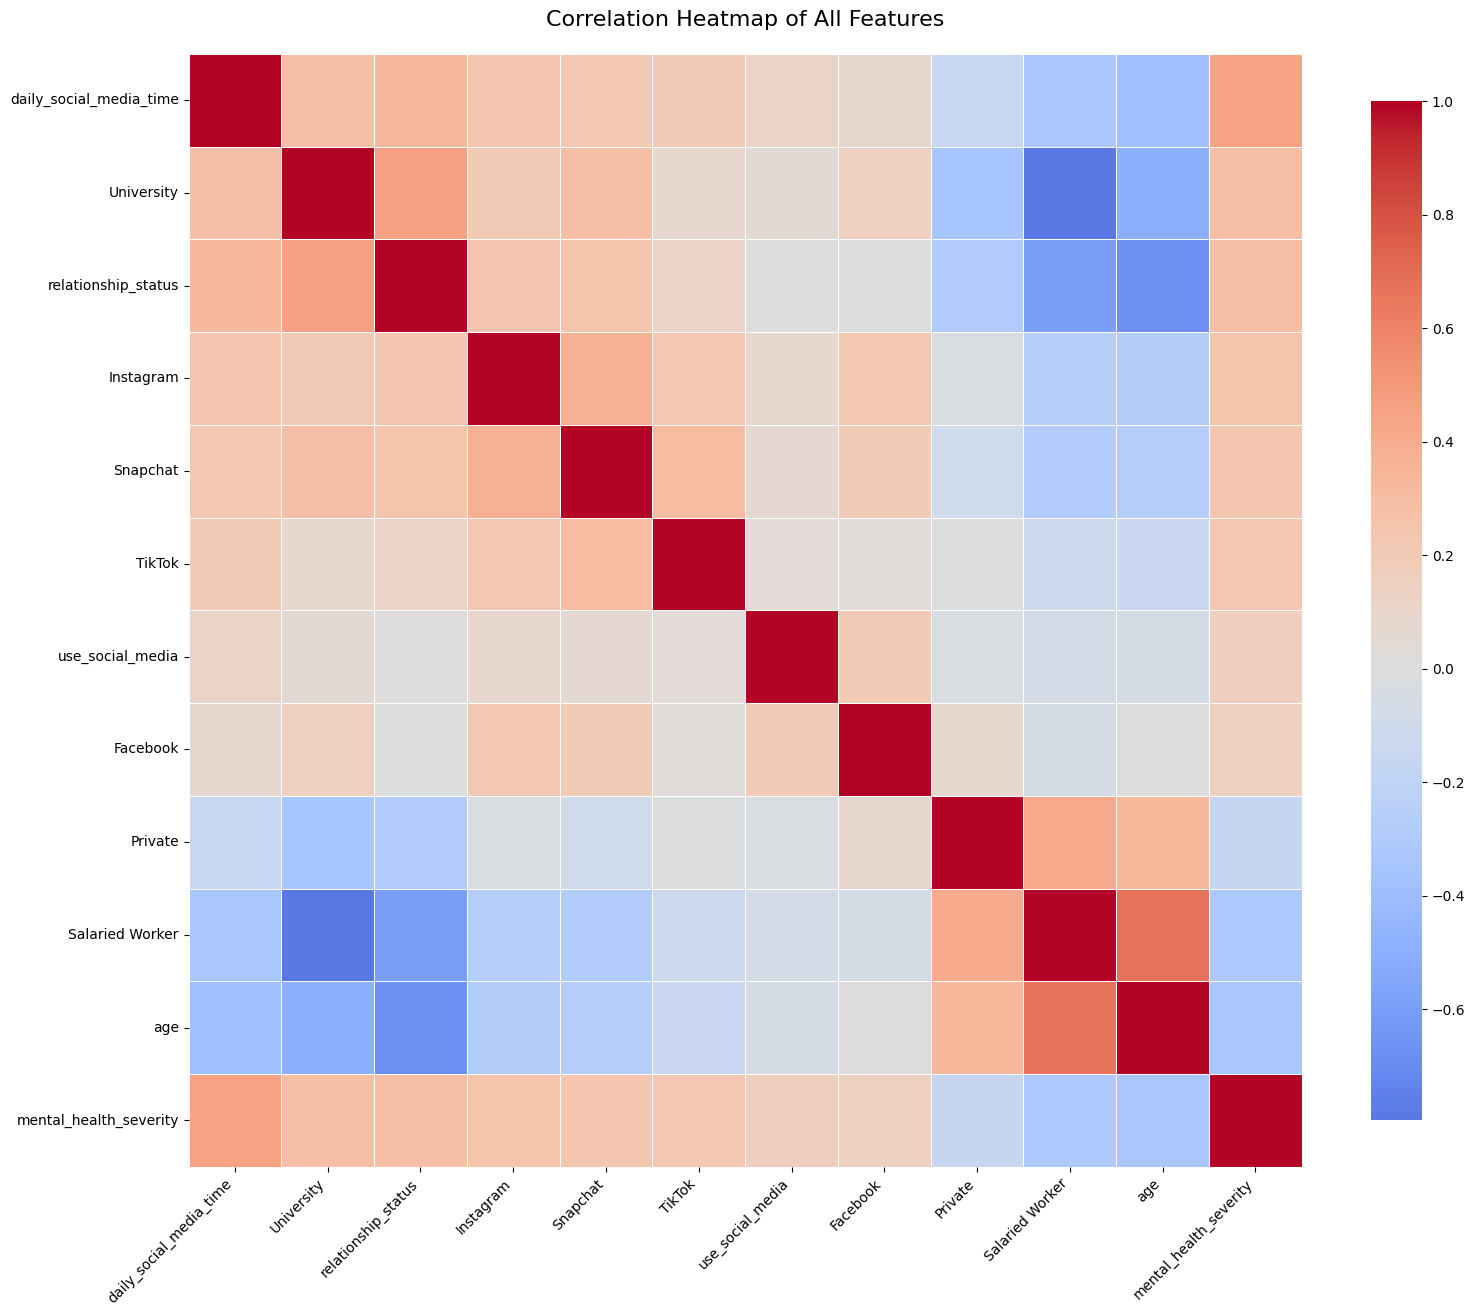


Strong Correlations:

Correlations with Mental Health Severity:
daily_social_media_time    0.455867
University                 0.296744
relationship_status        0.288331
Instagram                  0.254721
Snapchat                   0.241923
TikTok                     0.229888
use_social_media           0.168846
Facebook                   0.150338
Private                   -0.158891
Salaried Worker           -0.317224
age                       -0.330070
Name: mental_health_severity, dtype: float64


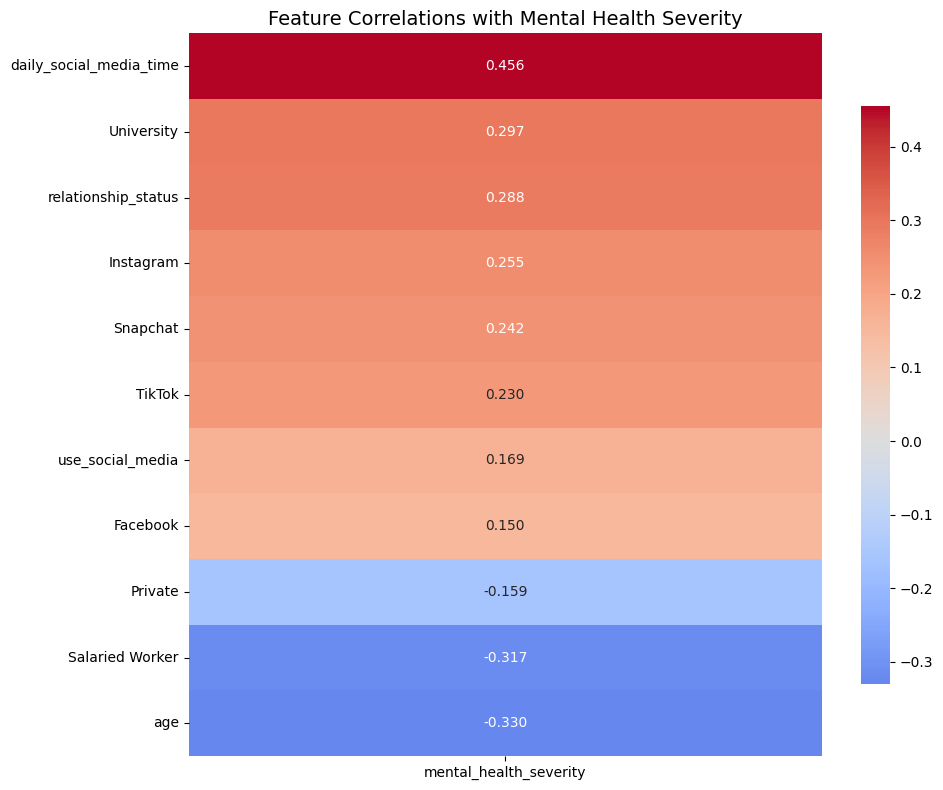

In [323]:
# Re-print the heatmap

# Calculate correlation matrix
corr_matrix = smmh.corr()

# Create a larger figure for better visibility
plt.figure(figsize=(16, 14))

# Create heatmap with smaller font and without annotations for clarity
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    xticklabels=True,
    yticklabels=True,
)

plt.title("Correlation Heatmap of All Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
# plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Alternative: Show only strong correlations (absolute value > 0.3)
print("\nStrong Correlations:")
print("=" * 60)

# Get correlation with mental_health_severity
mh_correlations = (
    corr_matrix["mental_health_severity"]
    .drop("mental_health_severity")
    .sort_values(ascending=False)
)
print("\nCorrelations with Mental Health Severity:")
print(mh_correlations)

# Create a focused heatmap on mental_health_severity
plt.figure(figsize=(10, 8))
mh_corr_df = mh_correlations.to_frame()
sns.heatmap(
    mh_corr_df,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Feature Correlations with Mental Health Severity", fontsize=14)
plt.tight_layout()
plt.show()

## Pattern Mining
Discover association rules and patterns between demographics, usage behavior, and mental health outcomes.

In [324]:
# Re-import the dataset for a fresh start
smmh_pattern = pd.read_csv('smmh.csv')

# Apply same renaming as before
smmh_pattern = smmh_pattern.rename(columns=new_column_names)

print(f"Dataset loaded: {smmh_pattern.shape}")
print(f"Columns: {list(smmh_pattern.columns)}")
smmh_pattern.head()

Dataset loaded: (481, 21)
Columns: ['timestamp', 'age', 'gender', 'relationship_status', 'occupation_status', 'affiliated_organizations', 'use_social_media', 'social_media_platforms', 'daily_social_media_time', 'frequency_social_media_no_purpose', 'frequency_social_media_distracted', 'restless_without_social_media', 'distractibility_scale', 'worry_level_scale', 'difficulty_concentrating', 'compare_to_successful_people_scale', 'feelings_about_comparisons', 'frequency_seeking_validation', 'frequency_feeling_depressed', 'interest_fluctuation_scale', 'sleep_issues_scale']


,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,...,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,compare_to_successful_people_scale,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [325]:
# Apply preprocessing steps
# Drop timestamp
smmh_pattern = smmh_pattern.drop(columns=['timestamp'])

# Remove whitespace
smmh_pattern.columns = smmh_pattern.columns.str.strip()
for col in smmh_pattern.select_dtypes(include=['object']).columns:
    smmh_pattern[col] = smmh_pattern[col].str.strip()

# Standardize gender entries
smmh_pattern = smmh_pattern.replace({
    "gender": {
        "Nonbinary": "Non-binary",
        "NB": "Non-binary",
        "Non binary": "Non-binary",
    }
})
smmh_pattern = smmh_pattern[(smmh_pattern["gender"] != "There are others???") & (smmh_pattern["gender"] != "unsure")]

# Standardize frequency scales (convert 1-5 to 0-4)
frequency_cols = [
    'frequency_social_media_no_purpose',
    'frequency_social_media_distracted',
    'restless_without_social_media',
    'distractibility_scale',
    'worry_level_scale',
    'difficulty_concentrating',
    'compare_to_successful_people_scale',
    'frequency_seeking_validation',
    'frequency_feeling_depressed',
    'interest_fluctuation_scale',
    'sleep_issues_scale'
]

for col in frequency_cols:
    smmh_pattern[col] = smmh_pattern[col] - 1

# Reverse feelings_about_comparisons
smmh_pattern['feelings_about_comparisons'] = 5 - smmh_pattern['feelings_about_comparisons'] - 1

# Handle missing values and duplicates
smmh_pattern = smmh_pattern.dropna()
smmh_pattern = smmh_pattern.drop_duplicates()

# Remove Non-binary gender for consistency
smmh_pattern = smmh_pattern[smmh_pattern['gender'] != 'Non-binary']

print(f"After preprocessing: {smmh_pattern.shape}")
smmh_pattern.info()

After preprocessing: (446, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 480
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 446 non-null    float64
 1   gender                              446 non-null    object 
 2   relationship_status                 446 non-null    object 
 3   occupation_status                   446 non-null    object 
 4   affiliated_organizations            446 non-null    object 
 5   use_social_media                    446 non-null    object 
 6   social_media_platforms              446 non-null    object 
 7   daily_social_media_time             446 non-null    object 
 8   frequency_social_media_no_purpose   446 non-null    int64  
 9   frequency_social_media_distracted   446 non-null    int64  
 10  restless_without_social_media       446 non-null    int64  
 11  distractibility_sca

In [326]:
# Calculate mental health severity score
adhd_severity = (
    smmh_pattern['frequency_social_media_no_purpose'] +
    smmh_pattern['frequency_social_media_distracted'] +
    smmh_pattern['distractibility_scale'] +
    smmh_pattern['difficulty_concentrating']
) / 4

anxiety_severity = (
    smmh_pattern['restless_without_social_media'] +
    smmh_pattern['worry_level_scale']
) / 2

self_esteem_severity = (
    smmh_pattern['compare_to_successful_people_scale'] +
    smmh_pattern['feelings_about_comparisons'] +
    smmh_pattern['frequency_seeking_validation']
) / 3

depression_severity = (
    smmh_pattern['frequency_feeling_depressed'] +
    smmh_pattern['interest_fluctuation_scale'] +
    smmh_pattern['sleep_issues_scale']
) / 3

smmh_pattern['mental_health_severity'] = (
    adhd_severity +
    anxiety_severity +
    self_esteem_severity +
    depression_severity
)

print(f"Mental health severity range: {smmh_pattern['mental_health_severity'].min():.2f} - {smmh_pattern['mental_health_severity'].max():.2f}")
print(f"Mean severity: {smmh_pattern['mental_health_severity'].mean():.2f}")
print(f"Median severity: {smmh_pattern['mental_health_severity'].median():.2f}")

Mental health severity range: 1.00 - 15.33
Mean severity: 8.15
Median severity: 8.33


In [327]:
# Map daily social media time to numeric scale
time_mapping = {
    'Less than an Hour': 0,
    'Between 1 and 2 hours': 1,
    'Between 2 and 3 hours': 2,
    'Between 3 and 4 hours': 3,
    'Between 4 and 5 hours': 4,
    'More than 5 hours': 5
}

smmh_pattern['daily_social_media_time'] = smmh_pattern['daily_social_media_time'].map(time_mapping)

# Create age groups for pattern mining
smmh_pattern['age_group'] = pd.cut(smmh_pattern['age'], 
                                     bins=[0, 20, 30, 40, 100], 
                                     labels=['Under 20', '20-30', '30-40', '40+'])

# Create usage time categories
smmh_pattern['usage_category'] = pd.cut(smmh_pattern['daily_social_media_time'],
                                         bins=[-1, 1, 3, 5],
                                         labels=['Low (0-1hr)', 'Medium (2-3hr)', 'High (4-5hr+)'])

# Create mental health severity categories based on quartiles
mh_percentiles = smmh_pattern['mental_health_severity'].quantile([0.33, 0.67])
smmh_pattern['mental_health_category'] = pd.cut(smmh_pattern['mental_health_severity'],
                                                  bins=[-1, mh_percentiles.iloc[0], mh_percentiles.iloc[1], 100],
                                                  labels=['Low', 'Medium', 'High'])

print("Categorical features created:")
print(f"Age groups: {smmh_pattern['age_group'].value_counts().to_dict()}")
print(f"Usage categories: {smmh_pattern['usage_category'].value_counts().to_dict()}")
print(f"Mental health categories: {smmh_pattern['mental_health_category'].value_counts().to_dict()}")

Categorical features created:
Age groups: {'20-30': 278, 'Under 20': 86, '40+': 50, '30-40': 32}
Usage categories: {'Medium (2-3hr)': 178, 'High (4-5hr+)': 170, 'Low (0-1hr)': 98}
Mental health categories: {'Medium': 151, 'Low': 149, 'High': 146}
Mental health categories: {'Medium': 151, 'Low': 149, 'High': 146}


### Association Rule Mining
Using the Apriori algorithm to discover patterns between demographics, usage, and mental health.

In [328]:
# Install mlxtend if needed (for association rules)
from mlxtend.frequent_patterns import apriori, association_rules

In [329]:
# Fix the transaction dataframe creation - use proper one-hot encoding
transactions_df = pd.DataFrame()

# Process each categorical column separately
for idx, row in smmh_pattern.iterrows():
    trans_row = {}
    
    # Demographics
    trans_row[f"gender_{row['gender']}"] = True
    trans_row[f"relationship_{row['relationship_status']}"] = True
    trans_row[f"occupation_{row['occupation_status']}"] = True
    trans_row[f"age_{row['age_group']}"] = True
    
    # Usage
    trans_row[f"usage_{row['usage_category']}"] = True
    
    # Mental health
    trans_row[f"mental_health_{row['mental_health_category']}"] = True
    
    # Platforms
    if pd.notna(row['social_media_platforms']):
        platforms = row['social_media_platforms'].split(', ')
        for platform in platforms:
            trans_row[f"platform_{platform}"] = True
    
    transactions_df = pd.concat([transactions_df, pd.DataFrame([trans_row])], ignore_index=True)

# Fill NaN with False
transactions_df = transactions_df.fillna(False)

print(f"Transaction dataset shape: {transactions_df.shape}")
print(f"Number of unique items: {transactions_df.shape[1]}")
print(f"\nSample of transaction items:")
print(transactions_df.columns.tolist()[:10])

Transaction dataset shape: (446, 29)
Number of unique items: 29

Sample of transaction items:
['gender_Male', 'relationship_In a relationship', 'occupation_University Student', 'age_20-30', 'usage_Medium (2-3hr)', 'mental_health_Medium', 'platform_Facebook', 'platform_Twitter', 'platform_Instagram', 'platform_YouTube']


/var/folders/8d/9v5ky4816mj94yhfw3ql0txc0000gn/T/ipykernel_79436/21641181.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transactions_df = transactions_df.fillna(False)


In [330]:
# Apply Apriori algorithm to find frequent itemsets
min_support = 0.1  # At least 10% of transactions

print("Mining frequent itemsets...")
frequent_itemsets = apriori(transactions_df, min_support=min_support, use_colnames=True)

print(f"Found {len(frequent_itemsets)} frequent itemsets")
print(f"\nTop 10 most frequent itemsets:")
frequent_itemsets_sorted = frequent_itemsets.sort_values('support', ascending=False)
print(frequent_itemsets_sorted.head(10))

Mining frequent itemsets...
Found 1977 frequent itemsets

Top 10 most frequent itemsets:
      support                                           itemsets
6    0.858744                                (platform_Facebook)
9    0.856502                                 (platform_YouTube)
110  0.760090              (platform_YouTube, platform_Facebook)
8    0.755605                               (platform_Instagram)
135  0.688341             (platform_YouTube, platform_Instagram)
109  0.681614            (platform_Facebook, platform_Instagram)
512  0.632287  (platform_YouTube, platform_Facebook, platform...
2    0.623318                    (occupation_University Student)
3    0.623318                                        (age_20-30)
13   0.585202                              (relationship_Single)


In [331]:
# Generate association rules
min_confidence = 0.5  # At least 50% confidence

print("Generating association rules...")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Add lift and conviction metrics
print(f"Found {len(rules)} association rules")

# Sort by lift to find the strongest associations
rules_sorted = rules.sort_values('lift', ascending=False)

print(f"\nTop 20 rules by lift (strongest associations):")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))

Generating association rules...
Found 15591 association rules

Top 20 rules by lift (strongest associations):
                                             antecedents  \
171                                            (age_40+)   
1438     (mental_health_Low, occupation_Salaried Worker)   
1437           (mental_health_Low, relationship_Married)   
4642            (platform_YouTube, relationship_Married)   
1383            (platform_YouTube, relationship_Married)   
166                               (relationship_Married)   
167                         (occupation_Salaried Worker)   
1121     (occupation_Salaried Worker, platform_Facebook)   
1122                              (relationship_Married)   
1120           (relationship_Married, platform_Facebook)   
1123                        (occupation_Salaried Worker)   
4637   (platform_YouTube, relationship_Married, platf...   
1385                              (relationship_Married)   
1382      (platform_YouTube, occupation_Salaried W

### Pattern Analysis: Mental Health Associations

In [332]:
mh_rules = rules[rules['consequents'].apply(lambda x: any('mental_health' in str(item) for item in x))]
mh_rules_sorted = mh_rules.sort_values('lift', ascending=False)

print(f"Found {len(mh_rules)} rules predicting mental health outcomes")
print(f"\nTop {min(15, len(mh_rules_sorted))} patterns:")
for idx, row in mh_rules_sorted.head(15).iterrows():
    antecedents = ', '.join([str(x) for x in row['antecedents']])
    consequents = ', '.join([str(x) for x in row['consequents']])
    print(f"{antecedents} → {consequents}")
    print(f"  Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")

Found 65 rules predicting mental health outcomes

Top 15 patterns:
usage_Low (0-1hr) → mental_health_Low
  Support: 0.139 | Confidence: 0.633 | Lift: 1.894
usage_High (4-5hr+), platform_Snapchat → mental_health_High, platform_Instagram
  Support: 0.101 | Confidence: 0.529 | Lift: 1.874
usage_High (4-5hr+), platform_Snapchat → platform_YouTube, mental_health_High
  Support: 0.103 | Confidence: 0.541 | Lift: 1.857
platform_YouTube, usage_Low (0-1hr) → mental_health_Low
  Support: 0.105 | Confidence: 0.618 | Lift: 1.851
platform_Facebook, usage_Low (0-1hr) → mental_health_Low
  Support: 0.108 | Confidence: 0.608 | Lift: 1.819
relationship_Married, occupation_Salaried Worker → mental_health_Low
  Support: 0.103 | Confidence: 0.605 | Lift: 1.812
usage_High (4-5hr+), gender_Female, platform_YouTube → mental_health_High, platform_Instagram
  Support: 0.103 | Confidence: 0.505 | Lift: 1.789
age_20-30, usage_High (4-5hr+), platform_Facebook, platform_YouTube → mental_health_High, platform_Insta

In [333]:
high_mh_rules = rules[rules['consequents'].apply(lambda x: 'mental_health_High' in str(x))]
high_mh_sorted = high_mh_rules.sort_values('lift', ascending=False).head(10)

print("Patterns associated with high mental health severity:")
for idx, row in high_mh_sorted.iterrows():
    antecedents = ', '.join([str(x) for x in row['antecedents']])
    print(f"{antecedents} → High MH")
    print(f"  Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")

Patterns associated with high mental health severity:
usage_High (4-5hr+), platform_Snapchat → High MH
  Support: 0.101 | Confidence: 0.529 | Lift: 1.874
usage_High (4-5hr+), platform_Snapchat → High MH
  Support: 0.103 | Confidence: 0.541 | Lift: 1.857
usage_High (4-5hr+), gender_Female, platform_YouTube → High MH
  Support: 0.103 | Confidence: 0.505 | Lift: 1.789
age_20-30, usage_High (4-5hr+), platform_Facebook, platform_YouTube → High MH
  Support: 0.117 | Confidence: 0.505 | Lift: 1.787
age_20-30, usage_High (4-5hr+), platform_Facebook, platform_Instagram → High MH
  Support: 0.117 | Confidence: 0.520 | Lift: 1.784
age_20-30, usage_High (4-5hr+), platform_Instagram → High MH
  Support: 0.121 | Confidence: 0.514 | Lift: 1.764
usage_High (4-5hr+), gender_Female, platform_Instagram → High MH
  Support: 0.103 | Confidence: 0.511 | Lift: 1.754
age_20-30, usage_High (4-5hr+), platform_YouTube, platform_Instagram → High MH
  Support: 0.117 | Confidence: 0.531 | Lift: 1.753
usage_High (4-

In [334]:
low_mh_rules = rules[rules['consequents'].apply(lambda x: 'mental_health_Low' in str(x))]
low_mh_sorted = low_mh_rules.sort_values('lift', ascending=False).head(10)

print("Patterns associated with low mental health severity:")
for idx, row in low_mh_sorted.iterrows():
    antecedents = ', '.join([str(x) for x in row['antecedents']])
    print(f"{antecedents} → Low MH")
    print(f"  Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")

Patterns associated with low mental health severity:
usage_Low (0-1hr) → Low MH
  Support: 0.139 | Confidence: 0.633 | Lift: 1.894
platform_YouTube, usage_Low (0-1hr) → Low MH
  Support: 0.105 | Confidence: 0.618 | Lift: 1.851
platform_Facebook, usage_Low (0-1hr) → Low MH
  Support: 0.108 | Confidence: 0.608 | Lift: 1.819
relationship_Married, occupation_Salaried Worker → Low MH
  Support: 0.103 | Confidence: 0.605 | Lift: 1.812
platform_YouTube, occupation_Salaried Worker → Low MH
  Support: 0.123 | Confidence: 0.556 | Lift: 1.663
relationship_Married → Low MH
  Support: 0.117 | Confidence: 0.553 | Lift: 1.656
occupation_Salaried Worker → Low MH
  Support: 0.152 | Confidence: 0.553 | Lift: 1.655
platform_YouTube, occupation_Salaried Worker, platform_Facebook → Low MH
  Support: 0.101 | Confidence: 0.536 | Lift: 1.604
occupation_Salaried Worker, platform_Facebook → Low MH
  Support: 0.119 | Confidence: 0.520 | Lift: 1.555


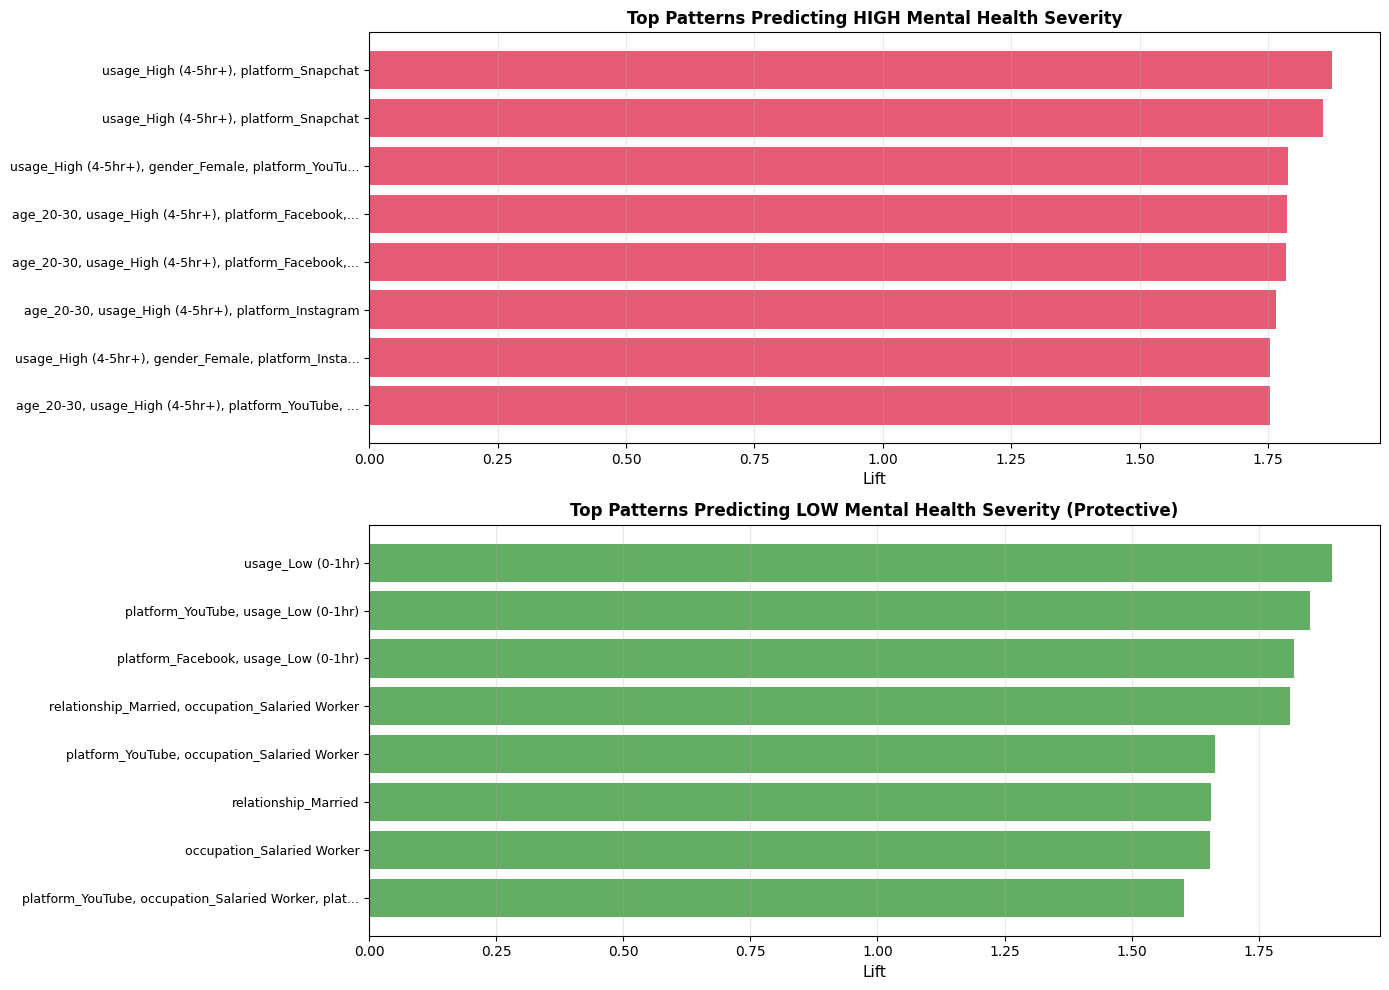

In [335]:
# Visualize top rules by lift
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top rules for HIGH mental health severity
if len(high_mh_sorted) > 0:
    top_high = high_mh_sorted.head(8)
    rule_labels = [', '.join([str(x) for x in row['antecedents']]) for _, row in top_high.iterrows()]
    
    # Truncate long labels
    rule_labels = [label[:50] + '...' if len(label) > 50 else label for label in rule_labels]
    
    axes[0].barh(range(len(top_high)), top_high['lift'], color='crimson', alpha=0.7)
    axes[0].set_yticks(range(len(top_high)))
    axes[0].set_yticklabels(rule_labels, fontsize=9)
    axes[0].set_xlabel('Lift', fontsize=11)
    axes[0].set_title('Top Patterns Predicting HIGH Mental Health Severity', fontsize=12, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()

# Top rules for LOW mental health severity
if len(low_mh_sorted) > 0:
    top_low = low_mh_sorted.head(8)
    rule_labels = [', '.join([str(x) for x in row['antecedents']]) for _, row in top_low.iterrows()]
    
    # Truncate long labels
    rule_labels = [label[:50] + '...' if len(label) > 50 else label for label in rule_labels]
    
    axes[1].barh(range(len(top_low)), top_low['lift'], color='forestgreen', alpha=0.7)
    axes[1].set_yticks(range(len(top_low)))
    axes[1].set_yticklabels(rule_labels, fontsize=9)
    axes[1].set_xlabel('Lift', fontsize=11)
    axes[1].set_title('Top Patterns Predicting LOW Mental Health Severity (Protective)', fontsize=12, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Specific Pattern Analysis: Usage Time Impact

In [336]:
high_usage_rules = rules[rules['antecedents'].apply(lambda x: 'usage_High' in str(x))]
low_usage_rules = rules[rules['antecedents'].apply(lambda x: 'usage_Low' in str(x))]

high_time_rules = high_usage_rules[high_usage_rules['consequents'].apply(lambda x: 'mental_health' in str(x))]
high_time_sorted = high_time_rules.sort_values('lift', ascending=False)

print("High usage patterns:")
for idx, row in high_time_sorted.head(5).iterrows():
    consequents = ', '.join([str(x) for x in row['consequents']])
    print(f"High Usage → {consequents}: Conf={row['confidence']:.3f}, Lift={row['lift']:.3f}")

low_time_rules = low_usage_rules[low_usage_rules['consequents'].apply(lambda x: 'mental_health' in str(x))]
low_time_sorted = low_time_rules.sort_values('lift', ascending=False)

print("\nLow usage patterns:")
for idx, row in low_time_sorted.head(5).iterrows():
    consequents = ', '.join([str(x) for x in row['consequents']])
    print(f"Low Usage → {consequents}: Conf={row['confidence']:.3f}, Lift={row['lift']:.3f}")

High usage patterns:
High Usage → mental_health_High, platform_Instagram: Conf=0.529, Lift=1.874
High Usage → platform_YouTube, mental_health_High: Conf=0.541, Lift=1.857
High Usage → mental_health_High, platform_Instagram: Conf=0.505, Lift=1.789
High Usage → mental_health_High, platform_Instagram: Conf=0.505, Lift=1.787
High Usage → platform_YouTube, mental_health_High: Conf=0.520, Lift=1.784

Low usage patterns:
Low Usage → mental_health_Low: Conf=0.633, Lift=1.894
Low Usage → mental_health_Low: Conf=0.618, Lift=1.851
Low Usage → mental_health_Low: Conf=0.608, Lift=1.819


### Demographic Pattern Analysis

In [337]:
relationship_rules = rules[rules['antecedents'].apply(lambda x: any('relationship_' in str(item) for item in x))]
relationship_mh_rules = relationship_rules[relationship_rules['consequents'].apply(lambda x: 'mental_health' in str(x))]
relationship_sorted = relationship_mh_rules.sort_values('lift', ascending=False).head(10)

print("Relationship status patterns:")
for idx, row in relationship_sorted.iterrows():
    antecedents = ', '.join([str(x) for x in row['antecedents']])
    consequents = ', '.join([str(x) for x in row['consequents']])
    print(f"{antecedents} → {consequents}")
    print(f"  Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f} | Support: {row['support']:.3f}")

Relationship status patterns:
relationship_Married, occupation_Salaried Worker → mental_health_Low
  Confidence: 0.605 | Lift: 1.812 | Support: 0.103
relationship_Married → mental_health_Low
  Confidence: 0.553 | Lift: 1.656 | Support: 0.117
usage_High (4-5hr+), relationship_Single, platform_Facebook → mental_health_High
  Confidence: 0.516 | Lift: 1.576 | Support: 0.110
usage_High (4-5hr+), relationship_Single, platform_Facebook, platform_YouTube → mental_health_High
  Confidence: 0.511 | Lift: 1.561 | Support: 0.103
usage_High (4-5hr+), platform_YouTube, relationship_Single, platform_Instagram → mental_health_High
  Confidence: 0.506 | Lift: 1.545 | Support: 0.101


In [338]:
# Analyze age group patterns
age_rules = rules[rules['antecedents'].apply(lambda x: any('age_' in str(item) for item in x))]
age_mh_rules = age_rules[age_rules['consequents'].apply(lambda x: 'mental_health' in str(x))]
age_sorted = age_mh_rules.sort_values('lift', ascending=False).head(10)

print("Age group patterns:")
for idx, row in age_sorted.iterrows():
    antecedents = ', '.join([str(x) for x in row['antecedents']])
    consequents = ', '.join([str(x) for x in row['consequents']])
    print(f"{antecedents} → {consequents}")
    print(f"  Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f} | Support: {row['support']:.3f}")

Age group patterns:
usage_Low (0-1hr) → mental_health_Low
  Confidence: 0.633 | Lift: 1.894 | Support: 0.139
usage_High (4-5hr+), platform_Snapchat → mental_health_High, platform_Instagram
  Confidence: 0.529 | Lift: 1.874 | Support: 0.101
usage_High (4-5hr+), platform_Snapchat → platform_YouTube, mental_health_High
  Confidence: 0.541 | Lift: 1.857 | Support: 0.103
platform_YouTube, usage_Low (0-1hr) → mental_health_Low
  Confidence: 0.618 | Lift: 1.851 | Support: 0.105
platform_Facebook, usage_Low (0-1hr) → mental_health_Low
  Confidence: 0.608 | Lift: 1.819 | Support: 0.108
usage_High (4-5hr+), gender_Female, platform_YouTube → mental_health_High, platform_Instagram
  Confidence: 0.505 | Lift: 1.789 | Support: 0.103
age_20-30, usage_High (4-5hr+), platform_Facebook, platform_YouTube → mental_health_High, platform_Instagram
  Confidence: 0.505 | Lift: 1.787 | Support: 0.117
age_20-30, usage_High (4-5hr+), platform_Facebook, platform_Instagram → platform_YouTube, mental_health_High
  

### Summary Statistics: Pattern Mining Results

In [339]:
print("\nPART 2: PATTERN MINING SUMMARY")
print(f"Total users analyzed: {len(smmh_pattern)}")
print(f"Total association rules: {len(rules)}")
print(f"Rules predicting mental health: {len(mh_rules)}")
print(f"Average mental health severity: {smmh_pattern['mental_health_severity'].mean():.2f}")


PART 2: PATTERN MINING SUMMARY
Total users analyzed: 446
Total association rules: 15591
Rules predicting mental health: 65
Average mental health severity: 8.15


/var/folders/8d/9v5ky4816mj94yhfw3ql0txc0000gn/T/ipykernel_79436/1885677257.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_mh = smmh_pattern.groupby('usage_category')['mental_health_severity'].mean().sort_values()
/var/folders/8d/9v5ky4816mj94yhfw3ql0txc0000gn/T/ipykernel_79436/1885677257.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_mh = smmh_pattern.groupby('age_group')['mental_health_severity'].mean().sort_values()


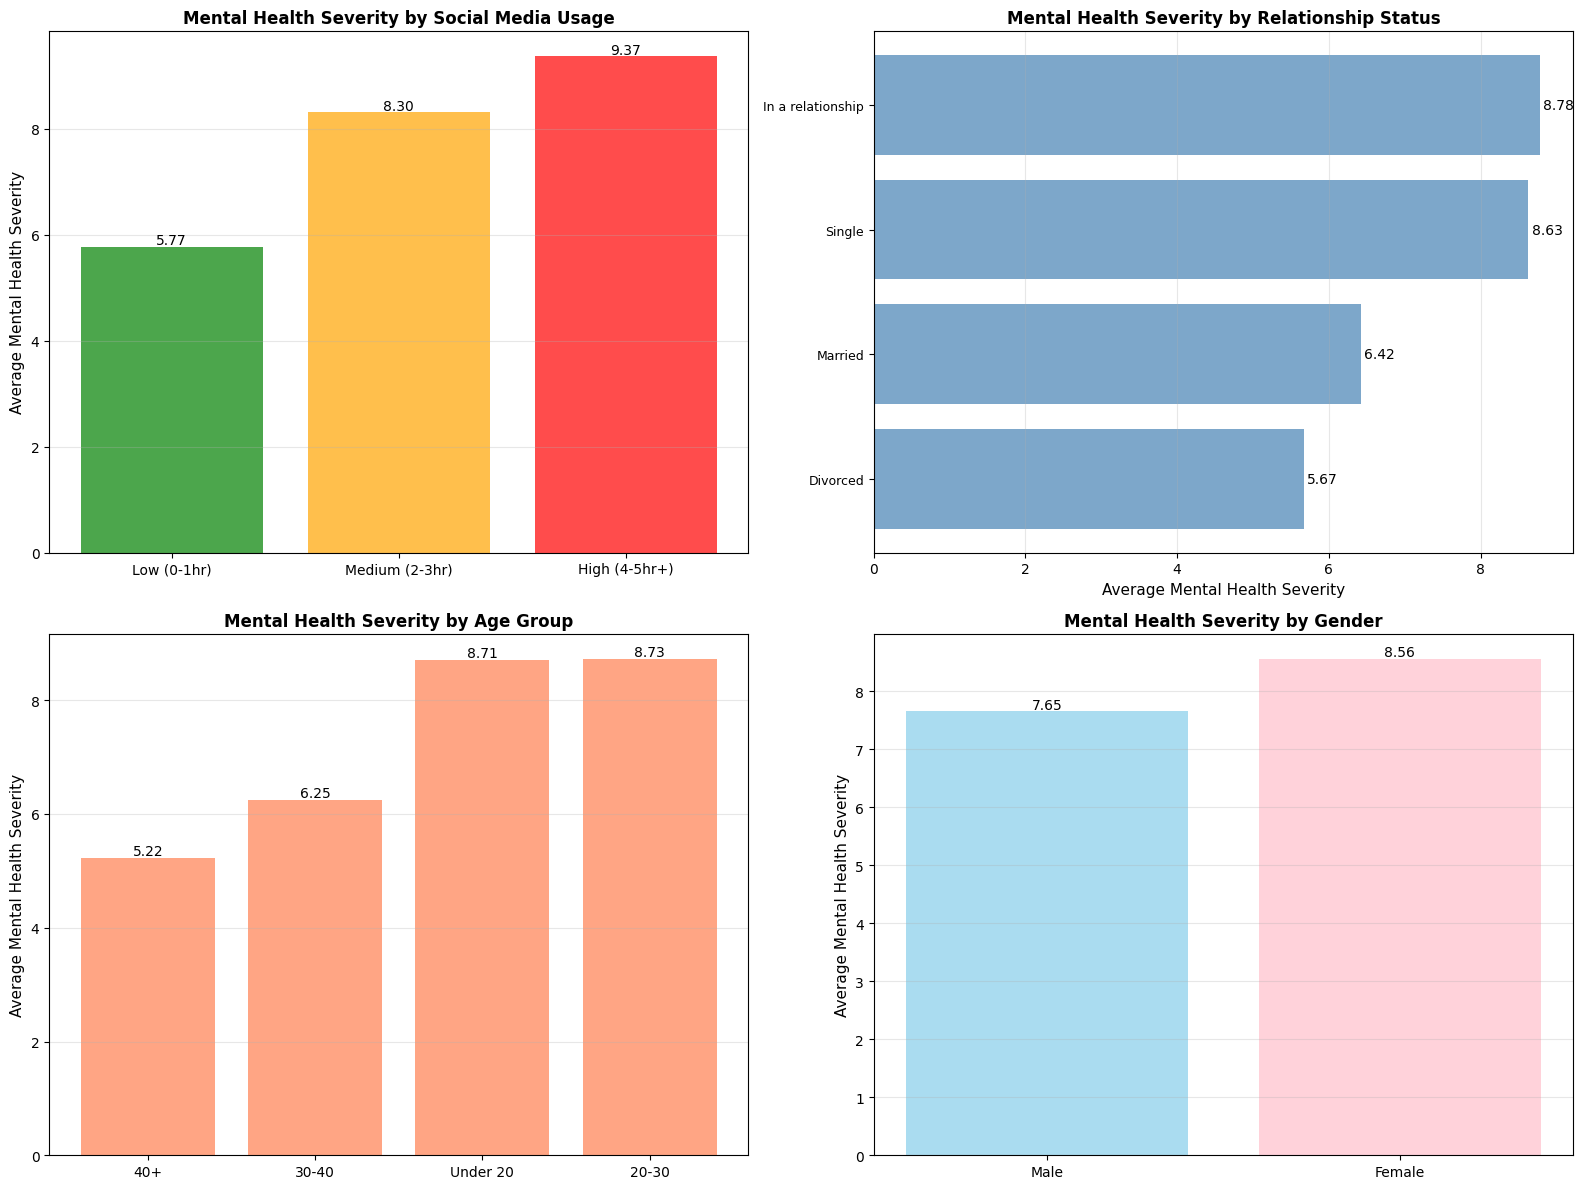

In [340]:
# Visualize mental health distribution across different factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Mental Health by Usage Category
usage_mh = smmh_pattern.groupby('usage_category')['mental_health_severity'].mean().sort_values()
axes[0, 0].bar(range(len(usage_mh)), usage_mh.values, color=['green', 'orange', 'red'], alpha=0.7)
axes[0, 0].set_xticks(range(len(usage_mh)))
axes[0, 0].set_xticklabels(usage_mh.index, rotation=0)
axes[0, 0].set_ylabel('Average Mental Health Severity', fontsize=11)
axes[0, 0].set_title('Mental Health Severity by Social Media Usage', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(usage_mh.values):
    axes[0, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

# 2. Mental Health by Relationship Status
rel_mh = smmh_pattern.groupby('relationship_status')['mental_health_severity'].mean().sort_values()
axes[0, 1].barh(range(len(rel_mh)), rel_mh.values, color='steelblue', alpha=0.7)
axes[0, 1].set_yticks(range(len(rel_mh)))
axes[0, 1].set_yticklabels(rel_mh.index, fontsize=9)
axes[0, 1].set_xlabel('Average Mental Health Severity', fontsize=11)
axes[0, 1].set_title('Mental Health Severity by Relationship Status', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(rel_mh.values):
    axes[0, 1].text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=10)

# 3. Mental Health by Age Group
age_mh = smmh_pattern.groupby('age_group')['mental_health_severity'].mean().sort_values()
axes[1, 0].bar(range(len(age_mh)), age_mh.values, color='coral', alpha=0.7)
axes[1, 0].set_xticks(range(len(age_mh)))
axes[1, 0].set_xticklabels(age_mh.index, rotation=0)
axes[1, 0].set_ylabel('Average Mental Health Severity', fontsize=11)
axes[1, 0].set_title('Mental Health Severity by Age Group', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(age_mh.values):
    axes[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

# 4. Mental Health by Gender
gender_mh = smmh_pattern.groupby('gender')['mental_health_severity'].mean().sort_values()
axes[1, 1].bar(range(len(gender_mh)), gender_mh.values, color=['skyblue', 'pink'], alpha=0.7)
axes[1, 1].set_xticks(range(len(gender_mh)))
axes[1, 1].set_xticklabels(gender_mh.index, rotation=0)
axes[1, 1].set_ylabel('Average Mental Health Severity', fontsize=11)
axes[1, 1].set_title('Mental Health Severity by Gender', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(gender_mh.values):
    axes[1, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Clustering Analysis
Discover natural user groups based on social media usage patterns and mental health indicators.

In [341]:
# Prepare features for clustering
# Exclude the target variable we created
X_cluster = smmh.drop(columns=['mental_health_severity']).copy()

# Standardize features for clustering (use a separate scaler to avoid overwriting)
scaler_clustering = StandardScaler()
X_cluster_scaled = scaler_clustering.fit_transform(X_cluster)

print(f"Dataset shape: {X_cluster.shape}")
print(f"Number of features: {X_cluster.shape[1]}")
print(f"Number of samples: {X_cluster.shape[0]}")

Dataset shape: (446, 11)
Number of features: 11
Number of samples: 446


In [342]:
# Import clustering libraries
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

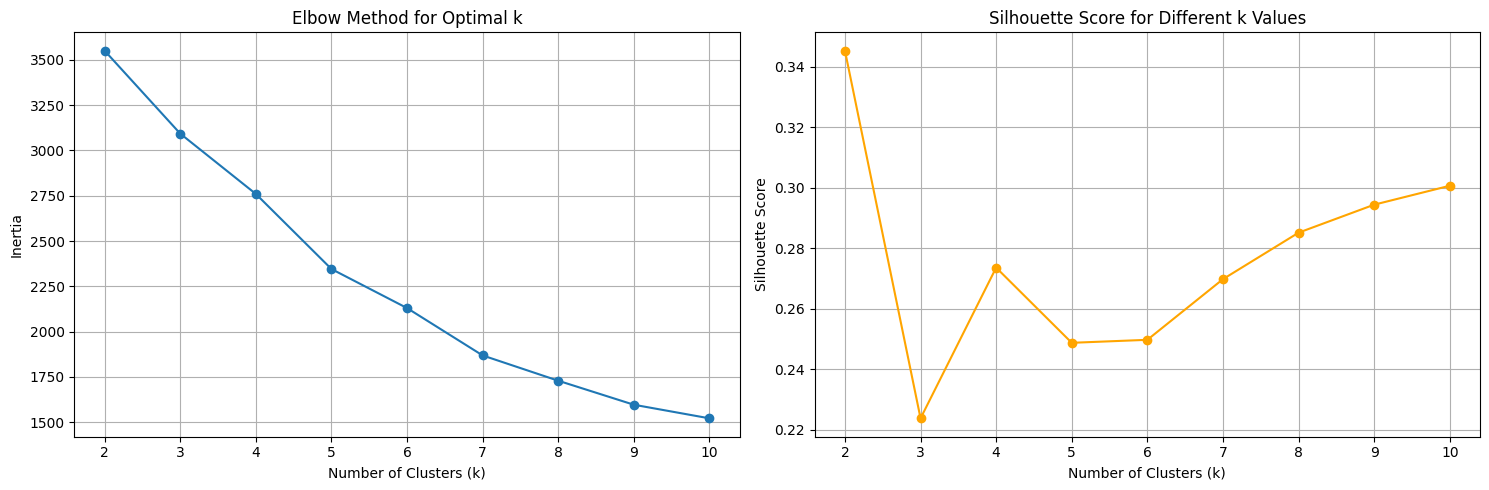

Best k based on Silhouette Score: 2
Max Silhouette Score: 0.345


In [343]:
# Determine optimal number of clusters using Elbow Method and Silhouette Score
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
		kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
		kmeans.fit(X_cluster_scaled)
		inertias.append(kmeans.inertia_)
		silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Plot Silhouette Scores
ax2.plot(k_range, silhouette_scores, marker='o', color='orange')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k Values')
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Best k based on Silhouette Score: {k_range[np.argmax(silhouette_scores)]}")
print(f"Max Silhouette Score: {max(silhouette_scores):.3f}")

### Model 1: K-Means Clustering

In [344]:
# Apply K-Means with optimal k from elbow and silhouette analysis
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
smmh['kmeans_cluster'] = kmeans_labels

# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_cluster_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_cluster_scaled, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(X_cluster_scaled, kmeans_labels)

print(f"K-Means Clustering Results (k={optimal_k}):")
print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin:.3f} (lower is better)")
print(f"Calinski-Harabasz Score: {kmeans_calinski_harabasz:.3f} (higher is better)")
print(f"\nCluster Distribution:")
print(smmh['kmeans_cluster'].value_counts().sort_index())

K-Means Clustering Results (k=2):
Silhouette Score: 0.345
Davies-Bouldin Index: 1.366 (lower is better)
Calinski-Harabasz Score: 169.565 (higher is better)

Cluster Distribution:
kmeans_cluster
0    117
1    329
Name: count, dtype: int64



Cluster Characteristics (Original Values):
                Mean Mental Health Severity  Mean Daily Time (0-5 scale)  \
kmeans_cluster                                                             
0                                      6.36                         1.89   
1                                      8.79                         3.26   

                Mean Age  
kmeans_cluster            
0                  38.62  
1                  21.50  

Most Common Daily Social Media Usage by Cluster:
  Cluster 0: Between 1 and 2 hours
  Cluster 1: More than 5 hours


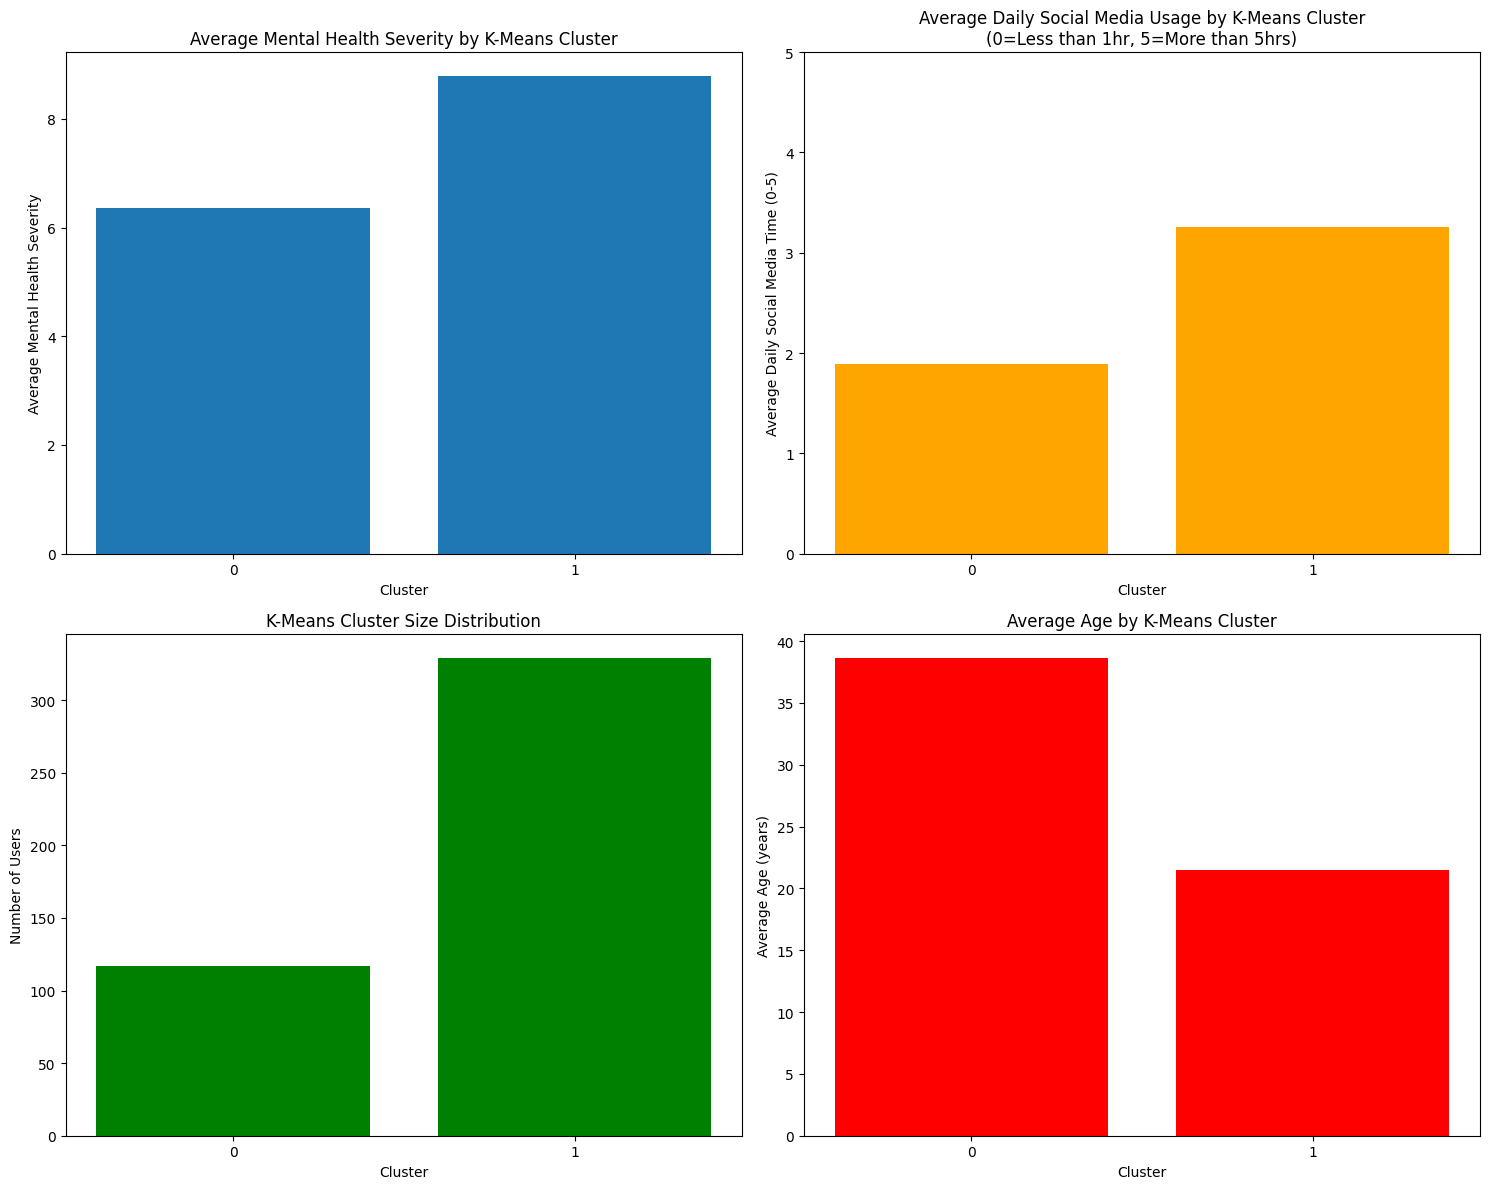

In [345]:
# Visualize K-Means clusters with ORIGINAL values
# First, get the data with original (unscaled) values
smmh_with_original = smmh.copy()

# Inverse transform the scaled columns to get original numeric values
original_values_temp = scaler_preprocessing.inverse_transform(
    smmh_with_original[['age', 'daily_social_media_time']]
)
smmh_with_original['age_original'] = original_values_temp[:, 0]
smmh_with_original['daily_social_media_time_original'] = original_values_temp[:, 1]

# Round and clip daily_social_media_time to valid range (0-5)
smmh_with_original['daily_social_media_time_original'] = smmh_with_original['daily_social_media_time_original'].round().astype(int).clip(0, 5)

# Map back to original time labels
smmh_with_original['daily_time_label'] = smmh_with_original['daily_social_media_time_original'].map(reverse_time_mapping)

# Create cluster summary with ORIGINAL values
cluster_summary_original = smmh_with_original.groupby('kmeans_cluster').agg({
    'mental_health_severity': 'mean',
    'daily_social_media_time_original': 'mean',
    'age_original': 'mean'
}).round(2)

cluster_summary_original.columns = ['Mean Mental Health Severity', 'Mean Daily Time (0-5 scale)', 'Mean Age']

print("\nCluster Characteristics (Original Values):")
print(cluster_summary_original)

# Show most common daily usage label for each cluster
print("\nMost Common Daily Social Media Usage by Cluster:")
for cluster in range(optimal_k):
    cluster_data = smmh_with_original[smmh_with_original['kmeans_cluster'] == cluster]
    most_common_time = cluster_data['daily_time_label'].mode()[0] if len(cluster_data) > 0 else 'N/A'
    print(f"  Cluster {cluster}: {most_common_time}")

# Plot cluster distribution with original values
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Mental health severity by cluster
axes[0, 0].bar(range(optimal_k), cluster_summary_original['Mean Mental Health Severity'])
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Average Mental Health Severity')
axes[0, 0].set_title('Average Mental Health Severity by K-Means Cluster')
axes[0, 0].set_xticks(range(optimal_k))

# Daily social media time by cluster (ORIGINAL scale 0-5)
axes[0, 1].bar(range(optimal_k), cluster_summary_original['Mean Daily Time (0-5 scale)'], color='orange')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Daily Social Media Time (0-5)')
axes[0, 1].set_title('Average Daily Social Media Usage by K-Means Cluster\n(0=Less than 1hr, 5=More than 5hrs)')
axes[0, 1].set_xticks(range(optimal_k))
axes[0, 1].set_ylim([0, 5])

# Cluster size distribution
cluster_counts = smmh['kmeans_cluster'].value_counts().sort_index()
axes[1, 0].bar(range(optimal_k), cluster_counts, color='green')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Users')
axes[1, 0].set_title('K-Means Cluster Size Distribution')
axes[1, 0].set_xticks(range(optimal_k))

# Age distribution by cluster (ORIGINAL values)
axes[1, 1].bar(range(optimal_k), cluster_summary_original['Mean Age'], color='red')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Age (years)')
axes[1, 1].set_title('Average Age by K-Means Cluster')
axes[1, 1].set_xticks(range(optimal_k))

plt.tight_layout()
plt.show()

In [346]:
# Analyze top social media platforms, occupation status, and relationship status per cluster
print("\nK-Means Cluster Analysis:")

# Get platform columns (social media platforms added as columns directly)
platform_names = ['Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Discord', 'Pinterest', 'Reddit', 'YouTube', 'WhatsApp']
platform_columns = [col for col in platform_names if col in smmh.columns]

# Get occupation columns
occupation_names = ['Company', 'Goverment', 'Private', 'School', 'University', 'Retired', 'Salaried Worker']
occupation_columns = [col for col in occupation_names if col in smmh.columns]

# Get relationship columns
relationship_names = ['Divorced', 'In a relationship', 'Married', 'Single']
relationship_columns = [col for col in relationship_names if col in smmh.columns]

for cluster in range(optimal_k):
    print(f"\nCluster {cluster} (n={cluster_counts[cluster]} users)")
    
    cluster_data = smmh[smmh['kmeans_cluster'] == cluster]
    
    # Top social media platforms
    print(f"Top Social Media Platforms:")
    platform_usage = {}
    for col, name in zip(platform_columns, platform_names):
        usage_count = cluster_data[col].sum()
        if usage_count > 0:
            platform_usage[name] = usage_count
    
    # Sort by usage and display top 5
    top_platforms = sorted(platform_usage.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (platform, count) in enumerate(top_platforms, 1):
        percentage = (count / len(cluster_data)) * 100
        print(f"  {i}. {platform}: {count} users ({percentage:.1f}%)")
    
    # Top occupation status
    print(f"Top Occupation Status:")
    occupation_usage = {}
    for col in occupation_columns:
        name = col.replace('occupation_', '').replace('_', ' ')
        usage_count = cluster_data[col].sum()
        if usage_count > 0:
            occupation_usage[name] = usage_count
    
    top_occupations = sorted(occupation_usage.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (occupation, count) in enumerate(top_occupations, 1):
        percentage = (count / len(cluster_data)) * 100
        print(f"  {i}. {occupation}: {count} users ({percentage:.1f}%)")
    
    # Top relationship status
    print(f"Top Relationship Status:")
    relationship_usage = {}
    for col in relationship_columns:
        name = col.replace('relationship_', '').replace('_', ' ')
        usage_count = cluster_data[col].sum()
        if usage_count > 0:
            relationship_usage[name] = usage_count
    
    top_relationships = sorted(relationship_usage.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (relationship, count) in enumerate(top_relationships, 1):
        percentage = (count / len(cluster_data)) * 100
        print(f"  {i}. {relationship}: {count} users ({percentage:.1f}%)")
    
    # Cluster profile summary
    cluster_orig = smmh_with_original[smmh_with_original['kmeans_cluster'] == cluster]
    avg_age = cluster_orig['age_original'].mean()
    avg_time = cluster_orig['daily_social_media_time_original'].mean()
    avg_mh = cluster_data['mental_health_severity'].mean()
    
    print(f"Cluster Profile:")
    print(f"  Average Age: {avg_age:.1f} years")
    print(f"  Average Daily Social Media Time: {avg_time:.1f} (0-5 scale)")
    print(f"  Average Mental Health Severity: {avg_mh:.2f}")


K-Means Cluster Analysis:

Cluster 0 (n=117 users)
Top Social Media Platforms:
  1. Facebook: 98 users (83.8%)
  2. Instagram: 65 users (55.6%)
  3. Twitter: 12 users (10.3%)
  4. Snapchat: 10 users (8.5%)
Top Occupation Status:
  1. Salaried Worker: 112 users (95.7%)
  2. Private: 61 users (52.1%)
  3. University: 2 users (1.7%)
Top Relationship Status:
Cluster Profile:
  Average Age: 38.6 years
  Average Daily Social Media Time: 1.9 (0-5 scale)
  Average Mental Health Severity: 6.36

Cluster 1 (n=329 users)
Top Social Media Platforms:
  1. Facebook: 285 users (86.6%)
  2. Instagram: 272 users (82.7%)
  3. Twitter: 158 users (48.0%)
  4. Snapchat: 75 users (22.8%)
Top Occupation Status:
  1. University: 276 users (83.9%)
  2. Private: 33 users (10.0%)
  3. Salaried Worker: 11 users (3.3%)
Top Relationship Status:
Cluster Profile:
  Average Age: 21.5 years
  Average Daily Social Media Time: 3.3 (0-5 scale)
  Average Mental Health Severity: 8.79


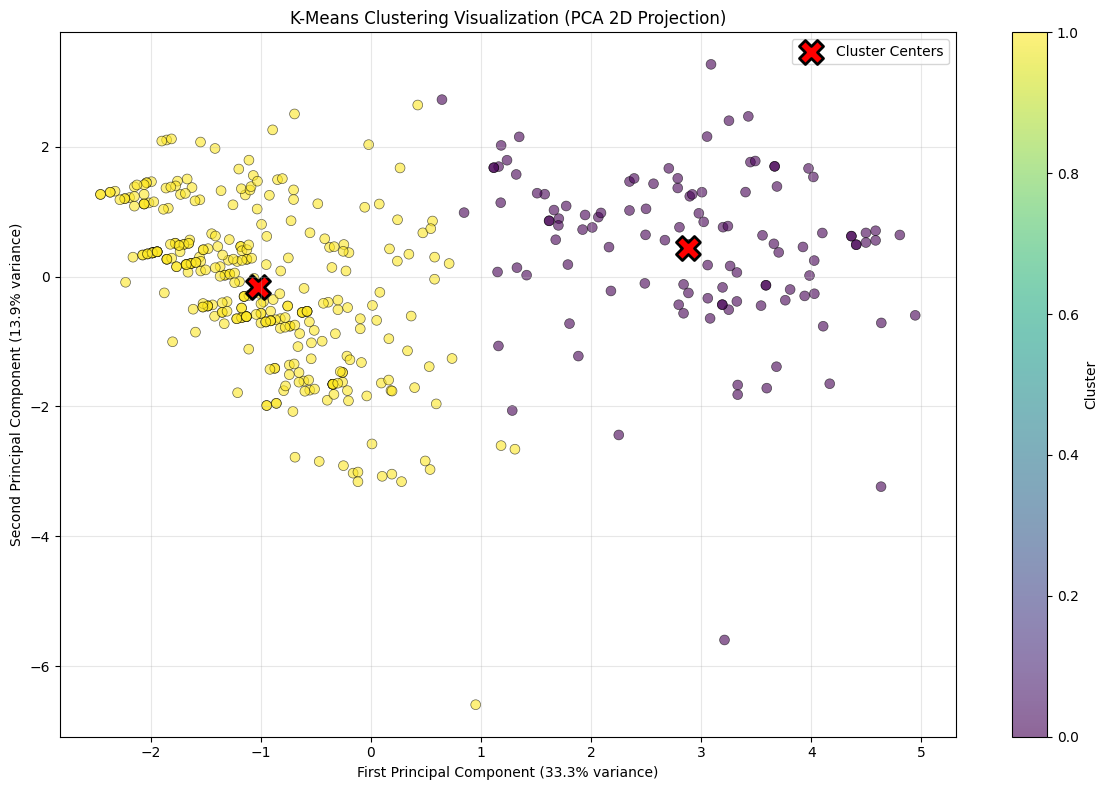


Total variance explained by 2 components: 47.2%


In [347]:
# Visualize K-Means clusters using PCA for 2D projection
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=kmeans_labels, 
                      cmap='viridis', 
                      s=50, 
                      alpha=0.6,
                      edgecolors='black',
                      linewidth=0.5)

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', 
           marker='X', 
           s=300, 
           edgecolors='black',
           linewidth=2,
           label='Cluster Centers')

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('K-Means Clustering Visualization (PCA 2D Projection)')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal variance explained by 2 components: {pca.explained_variance_ratio_.sum():.1%}")

### Model 2: DBSCAN Clustering

In [348]:
# Apply DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
smmh['dbscan_cluster'] = dbscan_labels

# Count clusters and noise points
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN Clustering Results:")
print(f"Number of clusters found: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")
print(f"\nCluster Distribution:")
print(smmh['dbscan_cluster'].value_counts().sort_index())

# Evaluate DBSCAN (excluding noise points)
if n_clusters_dbscan > 1:
		mask = dbscan_labels != -1
		if sum(mask) > 0:
				dbscan_silhouette = silhouette_score(X_cluster_scaled[mask], dbscan_labels[mask])
				dbscan_davies_bouldin = davies_bouldin_score(X_cluster_scaled[mask], dbscan_labels[mask])
				dbscan_calinski_harabasz = calinski_harabasz_score(X_cluster_scaled[mask], dbscan_labels[mask])
				
				print(f"\nDBSCAN Evaluation (excluding noise):")
				print(f"Silhouette Score: {dbscan_silhouette:.3f}")
				print(f"Davies-Bouldin Index: {dbscan_davies_bouldin:.3f}")
				print(f"Calinski-Harabasz Score: {dbscan_calinski_harabasz:.3f}")
else:
		print("\nDBSCAN found only 1 cluster or all noise - metrics cannot be calculated")

DBSCAN Clustering Results:
Number of clusters found: 1
Number of noise points: 4

Cluster Distribution:
dbscan_cluster
-1      4
 0    442
Name: count, dtype: int64

DBSCAN found only 1 cluster or all noise - metrics cannot be calculated


/var/folders/8d/9v5ky4816mj94yhfw3ql0txc0000gn/T/ipykernel_79436/1514107761.py:5: RuntimeWarning: invalid value encountered in scalar divide
  colors_dbscan = ['red' if label == -1 else plt.cm.viridis(label / max(dbscan_labels)) for label in dbscan_labels]


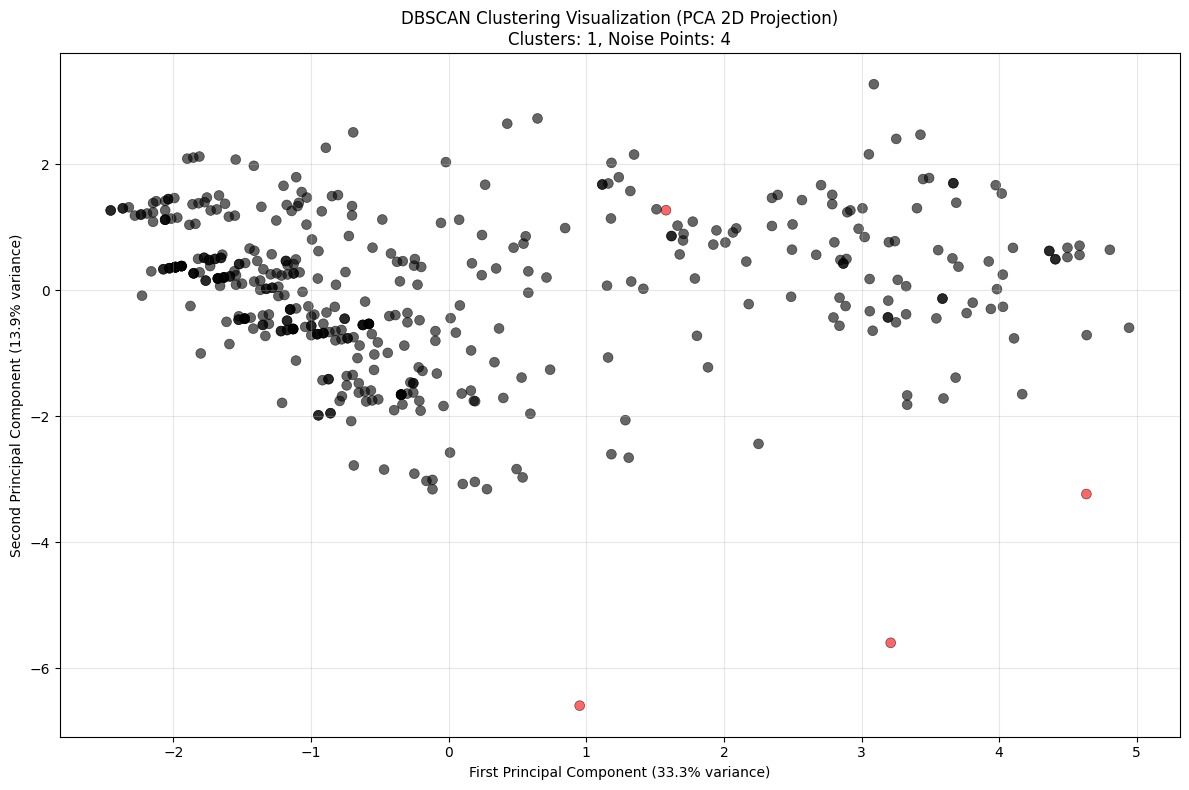

In [349]:
# Visualize DBSCAN clusters using PCA
plt.figure(figsize=(12, 8))

# Create color map - use different color for noise points (-1)
colors_dbscan = ['red' if label == -1 else plt.cm.viridis(label / max(dbscan_labels)) for label in dbscan_labels]

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=colors_dbscan, 
                      s=50, 
                      alpha=0.6,
                      edgecolors='black',
                      linewidth=0.5)

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title(f'DBSCAN Clustering Visualization (PCA 2D Projection)\nClusters: {n_clusters_dbscan}, Noise Points: {n_noise}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Model 3: Hierarchical Clustering

In [350]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
smmh['hierarchical_cluster'] = hierarchical_labels

# Evaluate Hierarchical Clustering
hierarchical_silhouette = silhouette_score(X_cluster_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X_cluster_scaled, hierarchical_labels)
hierarchical_calinski_harabasz = calinski_harabasz_score(X_cluster_scaled, hierarchical_labels)

print(f"Hierarchical Clustering Results (k={optimal_k}):")
print(f"Silhouette Score: {hierarchical_silhouette:.3f}")
print(f"Davies-Bouldin Index: {hierarchical_davies_bouldin:.3f}")
print(f"Calinski-Harabasz Score: {hierarchical_calinski_harabasz:.3f}")
print(f"\nCluster Distribution:")
print(smmh['hierarchical_cluster'].value_counts().sort_index())

Hierarchical Clustering Results (k=2):
Silhouette Score: 0.340
Davies-Bouldin Index: 1.427
Calinski-Harabasz Score: 163.290

Cluster Distribution:
hierarchical_cluster
0    123
1    323
Name: count, dtype: int64


In [351]:
# Analyze Hierarchical Clustering with ORIGINAL values
# Add original values to dataframe
smmh_with_original['hierarchical_cluster'] = smmh['hierarchical_cluster']

# Create cluster summary with ORIGINAL values for hierarchical
cluster_summary_hierarchical = smmh_with_original.groupby('hierarchical_cluster').agg({
    'mental_health_severity': 'mean',
    'daily_social_media_time_original': 'mean',
    'age_original': 'mean'
}).round(2)

cluster_summary_hierarchical.columns = ['Mean Mental Health Severity', 'Mean Daily Time (0-5 scale)', 'Mean Age']

print("\n" + "="*80)
print("Hierarchical Clustering - Cluster Characteristics (Original Values):")
print("="*80)
print(cluster_summary_hierarchical)

# Show most common daily usage label for each cluster
print("\nMost Common Daily Social Media Usage by Hierarchical Cluster:")
for cluster in range(optimal_k):
    cluster_data = smmh_with_original[smmh_with_original['hierarchical_cluster'] == cluster]
    if len(cluster_data) > 0:
        most_common_time = cluster_data['daily_time_label'].mode()[0]
        print(f"  Cluster {cluster}: {most_common_time}")


Hierarchical Clustering - Cluster Characteristics (Original Values):
                      Mean Mental Health Severity  \
hierarchical_cluster                                
0                                            6.48   
1                                            8.79   

                      Mean Daily Time (0-5 scale)  Mean Age  
hierarchical_cluster                                         
0                                            1.93     37.81  
1                                            3.28     21.49  

Most Common Daily Social Media Usage by Hierarchical Cluster:
  Cluster 0: Between 1 and 2 hours
  Cluster 1: More than 5 hours


In [352]:
# Analyze top social media platforms, occupation, and relationship for Hierarchical clusters
print("\nHierarchical Cluster Analysis:")

hierarchical_cluster_counts = smmh['hierarchical_cluster'].value_counts().sort_index()

for cluster in range(optimal_k):
    print(f"\nCluster {cluster} (n={hierarchical_cluster_counts[cluster]} users)")
    
    cluster_data = smmh[smmh['hierarchical_cluster'] == cluster]
    
    # Top social media platforms
    print(f"Top Social Media Platforms:")
    platform_usage = {}
    for col, name in zip(platform_columns, platform_names):
        usage_count = cluster_data[col].sum()
        if usage_count > 0:
            platform_usage[name] = usage_count
    
    top_platforms_hierarchical = sorted(platform_usage.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (platform, count) in enumerate(top_platforms_hierarchical, 1):
        percentage = (count / len(cluster_data)) * 100
        print(f"  {i}. {platform}: {count} users ({percentage:.1f}%)")
    
    # Top occupation status
    print(f"Top Occupation Status:")
    occupation_usage = {}
    for col in occupation_columns:
        name = col.replace('occupation_', '').replace('_', ' ')
        usage_count = cluster_data[col].sum()
        if usage_count > 0:
            occupation_usage[name] = usage_count
    
    top_occupations_hierarchical = sorted(occupation_usage.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (occupation, count) in enumerate(top_occupations_hierarchical, 1):
        percentage = (count / len(cluster_data)) * 100
        print(f"  {i}. {occupation}: {count} users ({percentage:.1f}%)")
    
    # Top relationship status
    print(f"Top Relationship Status:")
    relationship_usage = {}
    for col in relationship_columns:
        name = col.replace('relationship_', '').replace('_', ' ')
        usage_count = cluster_data[col].sum()
        if usage_count > 0:
            relationship_usage[name] = usage_count
    
    top_relationships_hierarchical = sorted(relationship_usage.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (relationship, count) in enumerate(top_relationships_hierarchical, 1):
        percentage = (count / len(cluster_data)) * 100
        print(f"  {i}. {relationship}: {count} users ({percentage:.1f}%)")
    
    # Cluster profile summary
    cluster_orig = smmh_with_original[smmh_with_original['hierarchical_cluster'] == cluster]
    avg_age = cluster_orig['age_original'].mean()
    avg_time = cluster_orig['daily_social_media_time_original'].mean()
    avg_mh = cluster_data['mental_health_severity'].mean()
    
    print(f"Cluster Profile:")
    print(f"  Average Age: {avg_age:.1f} years")
    print(f"  Average Daily Social Media Time: {avg_time:.1f} (0-5 scale)")
    print(f"  Average Mental Health Severity: {avg_mh:.2f}")


Hierarchical Cluster Analysis:

Cluster 0 (n=123 users)
Top Social Media Platforms:
  1. Facebook: 107 users (87.0%)
  2. Instagram: 73 users (59.3%)
  3. Twitter: 19 users (15.4%)
  4. Snapchat: 13 users (10.6%)
Top Occupation Status:
  1. Salaried Worker: 117 users (95.1%)
  2. Private: 61 users (49.6%)
  3. University: 3 users (2.4%)
Top Relationship Status:
Cluster Profile:
  Average Age: 37.8 years
  Average Daily Social Media Time: 1.9 (0-5 scale)
  Average Mental Health Severity: 6.48

Cluster 1 (n=323 users)
Top Social Media Platforms:
  1. Facebook: 276 users (85.4%)
  2. Instagram: 264 users (81.7%)
  3. Twitter: 151 users (46.7%)
  4. Snapchat: 72 users (22.3%)
Top Occupation Status:
  1. University: 275 users (85.1%)
  2. Private: 33 users (10.2%)
  3. Salaried Worker: 6 users (1.9%)
Top Relationship Status:
Cluster Profile:
  Average Age: 21.5 years
  Average Daily Social Media Time: 3.3 (0-5 scale)
  Average Mental Health Severity: 8.79


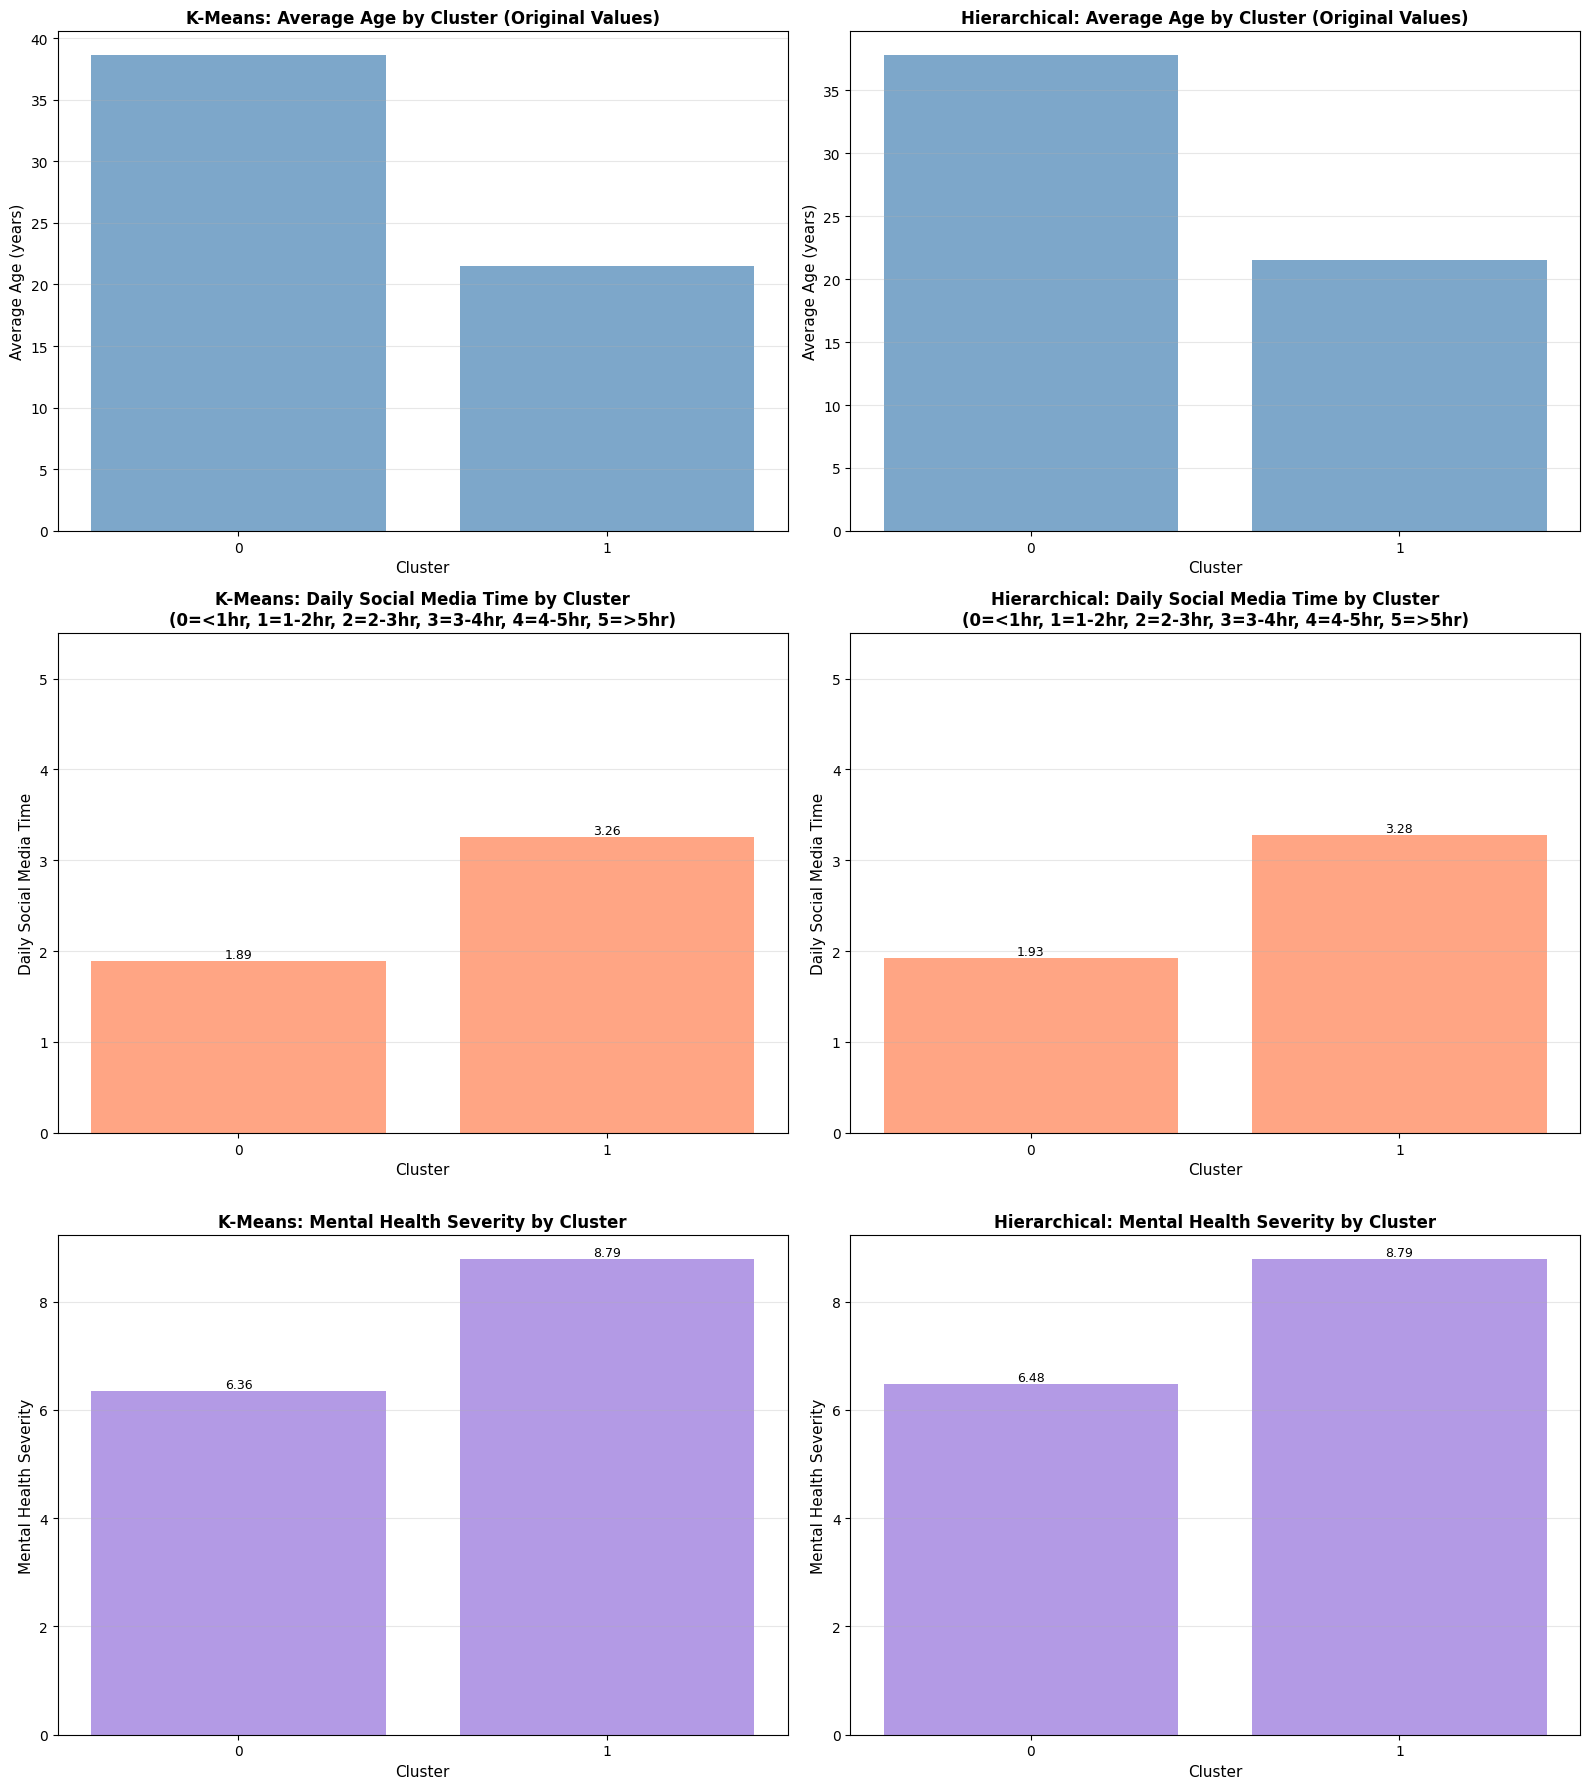


Note: All cluster characteristics are shown in their ORIGINAL values:
  • Age: actual years
  • Daily Social Media Time: 0-5 scale (0=Less than 1hr, 5=More than 5hrs)
  • Mental Health Severity: calculated score


In [353]:
# Enhanced visualization comparing K-Means and Hierarchical clusters with ORIGINAL values
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# K-Means visualizations (left column)
# 1. Age by cluster (original values)
axes[0, 0].bar(range(optimal_k), cluster_summary_original['Mean Age'], color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Cluster', fontsize=11)
axes[0, 0].set_ylabel('Average Age (years)', fontsize=11)
axes[0, 0].set_title('K-Means: Average Age by Cluster (Original Values)', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(optimal_k))
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Daily social media time (original 0-5 scale)
bars1 = axes[1, 0].bar(range(optimal_k), cluster_summary_original['Mean Daily Time (0-5 scale)'], 
                        color='coral', alpha=0.7)
axes[1, 0].set_xlabel('Cluster', fontsize=11)
axes[1, 0].set_ylabel('Daily Social Media Time', fontsize=11)
axes[1, 0].set_title('K-Means: Daily Social Media Time by Cluster\n(0=<1hr, 1=1-2hr, 2=2-3hr, 3=3-4hr, 4=4-5hr, 5=>5hr)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(optimal_k))
axes[1, 0].set_ylim([0, 5.5])
axes[1, 0].grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# 3. Mental health severity
bars2 = axes[2, 0].bar(range(optimal_k), cluster_summary_original['Mean Mental Health Severity'], 
                        color='mediumpurple', alpha=0.7)
axes[2, 0].set_xlabel('Cluster', fontsize=11)
axes[2, 0].set_ylabel('Mental Health Severity', fontsize=11)
axes[2, 0].set_title('K-Means: Mental Health Severity by Cluster', fontsize=12, fontweight='bold')
axes[2, 0].set_xticks(range(optimal_k))
axes[2, 0].grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    axes[2, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Hierarchical visualizations (right column)
# 1. Age by cluster (original values)
axes[0, 1].bar(range(optimal_k), cluster_summary_hierarchical['Mean Age'], color='steelblue', alpha=0.7)
axes[0, 1].set_xlabel('Cluster', fontsize=11)
axes[0, 1].set_ylabel('Average Age (years)', fontsize=11)
axes[0, 1].set_title('Hierarchical: Average Age by Cluster (Original Values)', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(optimal_k))
axes[0, 1].grid(axis='y', alpha=0.3)

# 2. Daily social media time (original 0-5 scale)
bars3 = axes[1, 1].bar(range(optimal_k), cluster_summary_hierarchical['Mean Daily Time (0-5 scale)'], 
                        color='coral', alpha=0.7)
axes[1, 1].set_xlabel('Cluster', fontsize=11)
axes[1, 1].set_ylabel('Daily Social Media Time', fontsize=11)
axes[1, 1].set_title('Hierarchical: Daily Social Media Time by Cluster\n(0=<1hr, 1=1-2hr, 2=2-3hr, 3=3-4hr, 4=4-5hr, 5=>5hr)', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(range(optimal_k))
axes[1, 1].set_ylim([0, 5.5])
axes[1, 1].grid(axis='y', alpha=0.3)
for bar in bars3:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# 3. Mental health severity
bars4 = axes[2, 1].bar(range(optimal_k), cluster_summary_hierarchical['Mean Mental Health Severity'], 
                        color='mediumpurple', alpha=0.7)
axes[2, 1].set_xlabel('Cluster', fontsize=11)
axes[2, 1].set_ylabel('Mental Health Severity', fontsize=11)
axes[2, 1].set_title('Hierarchical: Mental Health Severity by Cluster', fontsize=12, fontweight='bold')
axes[2, 1].set_xticks(range(optimal_k))
axes[2, 1].grid(axis='y', alpha=0.3)
for bar in bars4:
    height = bar.get_height()
    axes[2, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nNote: All cluster characteristics are shown in their ORIGINAL values:")
print("  • Age: actual years")
print("  • Daily Social Media Time: 0-5 scale (0=Less than 1hr, 5=More than 5hrs)")
print("  • Mental Health Severity: calculated score")

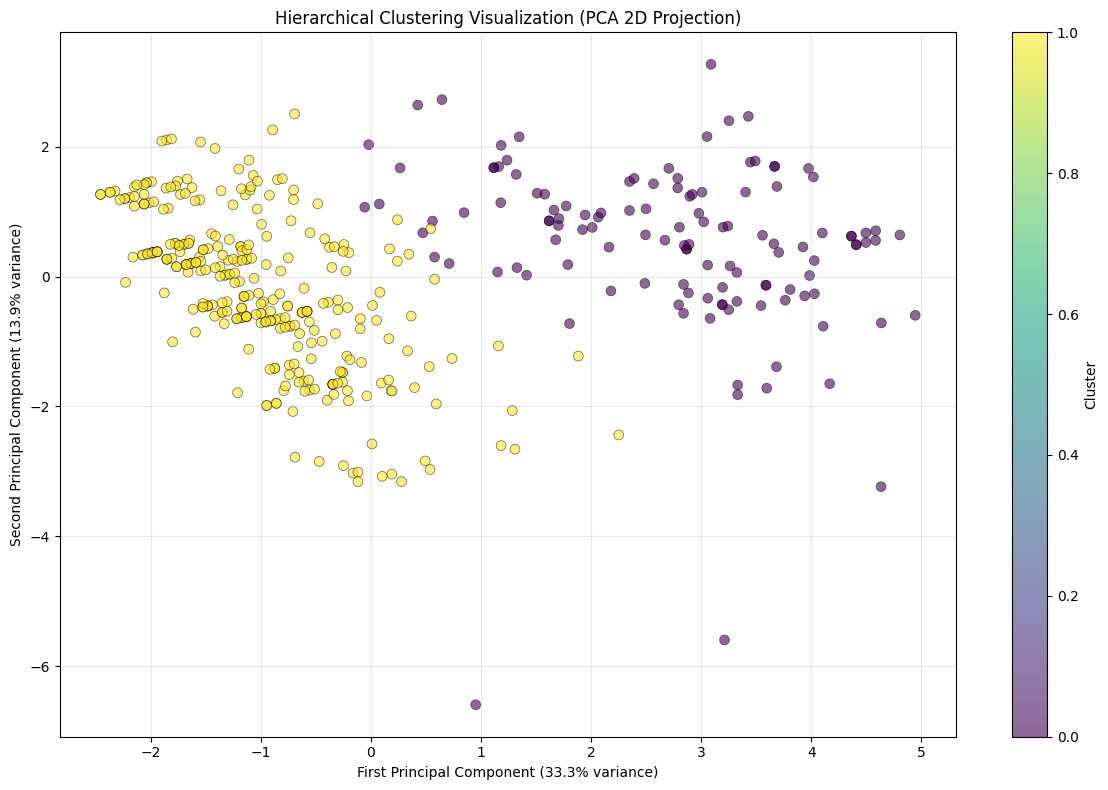

In [354]:
# Visualize Hierarchical clusters using PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=hierarchical_labels, 
                      cmap='viridis', 
                      s=50, 
                      alpha=0.6,
                      edgecolors='black',
                      linewidth=0.5)

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Hierarchical Clustering Visualization (PCA 2D Projection)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

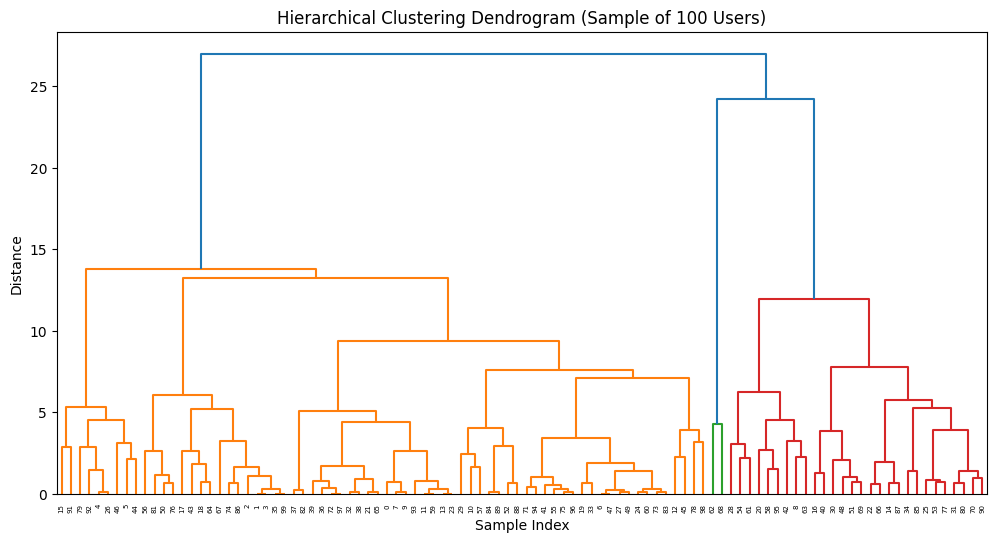

In [355]:
# Plot dendrogram for hierarchical clustering (sample of 100 points for clarity)
sample_indices = np.random.choice(len(X_cluster_scaled), size=min(100, len(X_cluster_scaled)), replace=False)
X_sample = X_cluster_scaled[sample_indices]

plt.figure(figsize=(12, 6))
linkage_matrix = linkage(X_sample, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Sample of 100 Users)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Clustering Methods Comparison:
      Method  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Score
     K-Means          0.345235              1.366085               169.565319
Hierarchical          0.339712              1.427243               163.290228


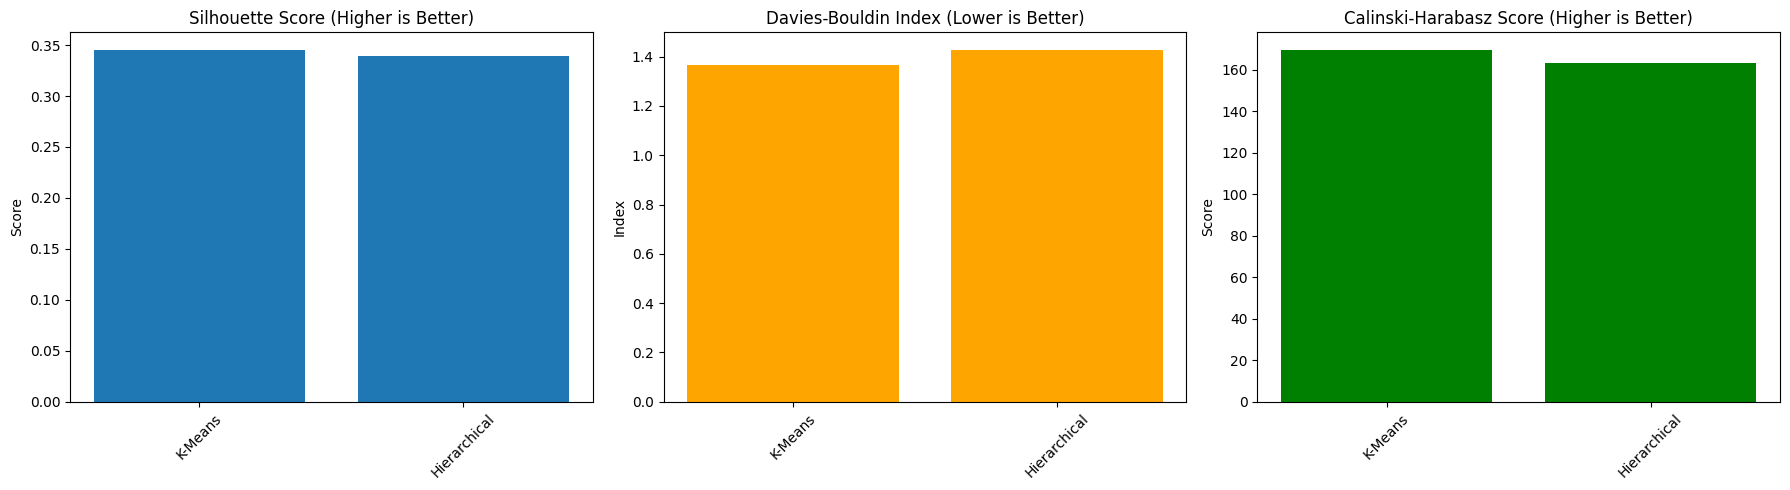

In [356]:
# Compare clustering methods
clustering_results = pd.DataFrame({
		'Method': ['K-Means', 'Hierarchical'],
		'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette],
		'Davies-Bouldin Index': [kmeans_davies_bouldin, hierarchical_davies_bouldin],
		'Calinski-Harabasz Score': [kmeans_calinski_harabasz, hierarchical_calinski_harabasz]
})

# Add DBSCAN if it produced valid clusters
if n_clusters_dbscan > 1:
		dbscan_row = pd.DataFrame({
				'Method': ['DBSCAN'],
				'Silhouette Score': [dbscan_silhouette],
				'Davies-Bouldin Index': [dbscan_davies_bouldin],
				'Calinski-Harabasz Score': [dbscan_calinski_harabasz]
		})
		clustering_results = pd.concat([clustering_results, dbscan_row], ignore_index=True)

print("\nClustering Methods Comparison:")
print(clustering_results.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score (higher is better)
axes[0].bar(clustering_results['Method'], clustering_results['Silhouette Score'])
axes[0].set_ylabel('Score')
axes[0].set_title('Silhouette Score (Higher is Better)')
axes[0].tick_params(axis='x', rotation=45)

# Davies-Bouldin Index (lower is better)
axes[1].bar(clustering_results['Method'], clustering_results['Davies-Bouldin Index'], color='orange')
axes[1].set_ylabel('Index')
axes[1].set_title('Davies-Bouldin Index (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)

# Calinski-Harabasz Score (higher is better)
axes[2].bar(clustering_results['Method'], clustering_results['Calinski-Harabasz Score'], color='green')
axes[2].set_ylabel('Score')
axes[2].set_title('Calinski-Harabasz Score (Higher is Better)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

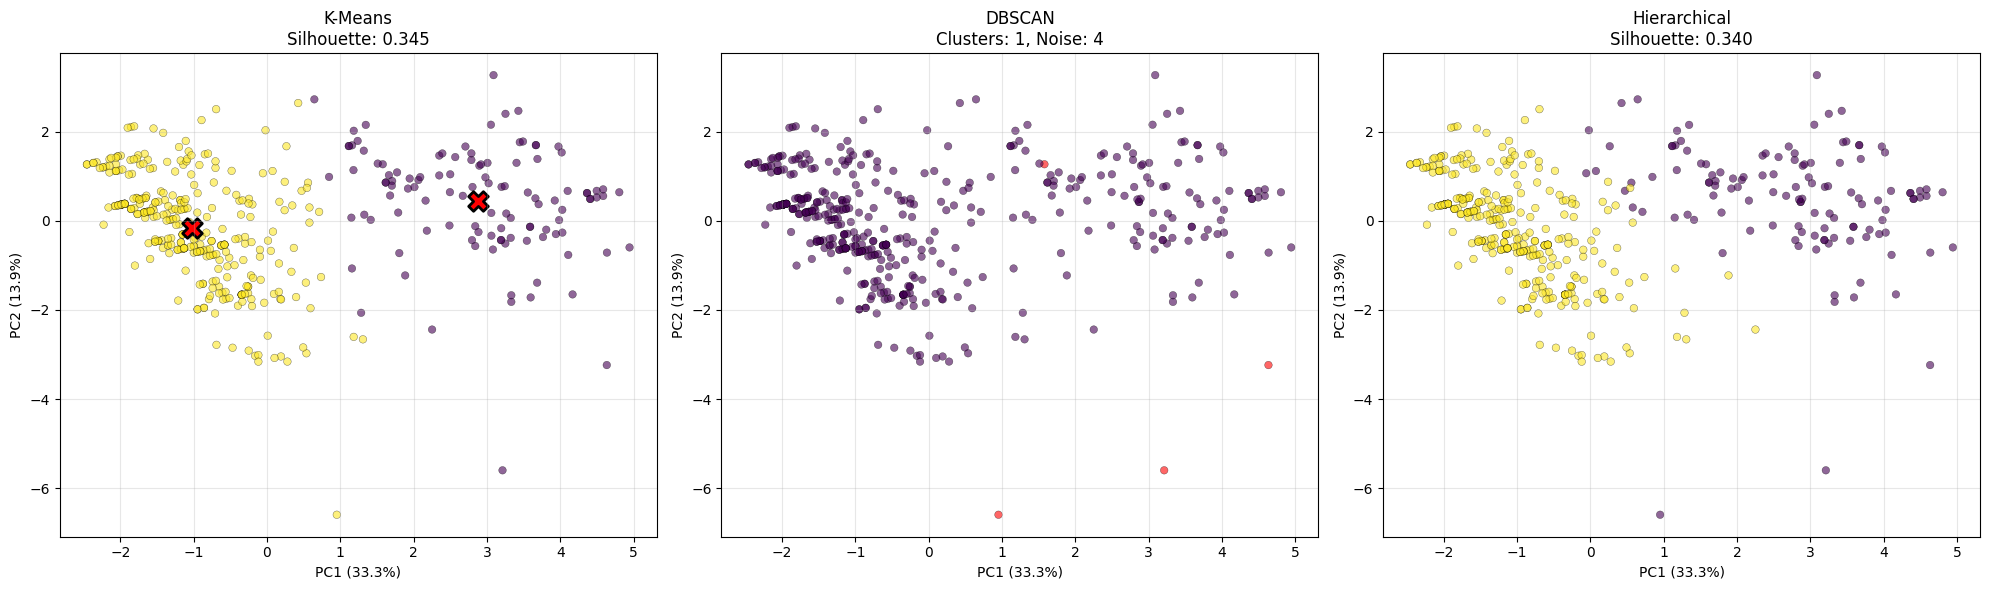

In [357]:
# Side-by-side comparison of all clustering methods
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=kmeans_labels, 
                           cmap='viridis', 
                           s=30, 
                           alpha=0.6,
                           edgecolors='black',
                           linewidth=0.3)
centers_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centers_pca[:, 0], centers_pca[:, 1], 
               c='red', 
               marker='X', 
               s=200, 
               edgecolors='black',
               linewidth=2)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].set_title(f'K-Means\nSilhouette: {kmeans_silhouette:.3f}')
axes[0].grid(True, alpha=0.3)

# DBSCAN
colors_dbscan = ['red' if label == -1 else plt.cm.viridis(label / max(dbscan_labels) if max(dbscan_labels) > 0 else 0) for label in dbscan_labels]
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], 
               c=colors_dbscan, 
               s=30, 
               alpha=0.6,
               edgecolors='black',
               linewidth=0.3)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].set_title(f'DBSCAN\nClusters: {n_clusters_dbscan}, Noise: {n_noise}')
axes[1].grid(True, alpha=0.3)

# Hierarchical
scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=hierarchical_labels, 
                           cmap='viridis', 
                           s=30, 
                           alpha=0.6,
                           edgecolors='black',
                           linewidth=0.3)
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[2].set_title(f'Hierarchical\nSilhouette: {hierarchical_silhouette:.3f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Classification Analysis
Classify mental health severity into categories using three classification models with GridSearchCV and KFold cross-validation.

In [358]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Use the preprocessed data from clustering
X_classification = X_cluster.copy()

# Binary classification: Low (<7.575) vs High (>=7.575)
y_classification = (smmh['mental_health_severity'] >= 7.575).map({True: 'High', False: 'Low'})

print(f"Dataset: {X_classification.shape}")
print(f"Target distribution:\n{y_classification.value_counts().sort_index()}")

Dataset: (446, 11)
Target distribution:
mental_health_severity
High    267
Low     179
Name: count, dtype: int64


In [359]:
# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"After split:")
print(f"Training set: {X_train_class.shape}")
print(f"Test set: {X_test_class.shape}")

After split:
Training set: (356, 11)
Test set: (90, 11)


In [360]:
# Configure models with pipelines and hyperparameter grids
models_config_class = {
    'Random Forest': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'Gradient Boosting': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5]
        }
    },
    'SVM': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', SVC(random_state=42))
        ]),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear'],
            'classifier__gamma': ['scale', 'auto']
        }
    }
}

# Train models with GridSearchCV and KFold
kfold_class = KFold(n_splits=5, shuffle=True, random_state=42)
trained_models_class = {}
results_class = []

for name, config in models_config_class.items():
    print(f"Training {name}...")
    
    grid_search = GridSearchCV(
        config['pipeline'],
        config['params'],
        cv=kfold_class,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_class, y_train_class)
    trained_models_class[name] = grid_search.best_estimator_
    
    y_pred = grid_search.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred)
    f1 = f1_score(y_test_class, y_pred, average='binary', pos_label='High')
    
    results_class.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'CV Accuracy': grid_search.best_score_,
        'Test Accuracy': accuracy,
        'F1 Score': f1
    })
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Test Set Performance: Accuracy={accuracy:.4f}, F1={f1:.4f}\n")

Training Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Test Set Performance: Accuracy=0.7222, F1=0.7826

Training Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Test Set Performance: Accuracy=0.7222, F1=0.7826

Training Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Test Set Performance: Accuracy=0.7111, F1=0.7903

Training SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Test Set Performance: Accuracy=0.7222, F1=0.8000

Best par

In [361]:
# Results comparison
classification_results = pd.DataFrame(results_class)
classification_results = classification_results.sort_values('Test Accuracy', ascending=False)
print("\nCLASSIFICATION RESULTS COMPARISON")
print(classification_results.to_string(index=False))


CLASSIFICATION RESULTS COMPARISON
            Model                                                                                        Best Params  CV Accuracy  Test Accuracy  F1 Score
    Random Forest {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}     0.713419       0.722222  0.782609
              SVM               {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}     0.696792       0.722222  0.800000
Gradient Boosting   {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}     0.702269       0.711111  0.790323


In [362]:
# Best model analysis
best_class_model_name = classification_results.iloc[0]['Model']
best_class_model = trained_models_class[best_class_model_name]
best_class_accuracy = classification_results.iloc[0]['Test Accuracy']
best_class_f1 = classification_results.iloc[0]['F1 Score']

print(f"\nBest Model: {best_class_model_name}")
print(f"Test Accuracy: {best_class_accuracy:.4f}")
print(f"F1 Score: {best_class_f1:.4f}")

# Detailed classification report
y_pred_best = best_class_model.predict(X_test_class)
print(f"\nClassification Report for {best_class_model_name}:")
print(classification_report(y_test_class, y_pred_best))


Best Model: Random Forest
Test Accuracy: 0.7222
F1 Score: 0.7826

Classification Report for Random Forest:
              precision    recall  f1-score   support

        High       0.74      0.83      0.78        54
         Low       0.69      0.56      0.62        36

    accuracy                           0.72        90
   macro avg       0.71      0.69      0.70        90
weighted avg       0.72      0.72      0.72        90



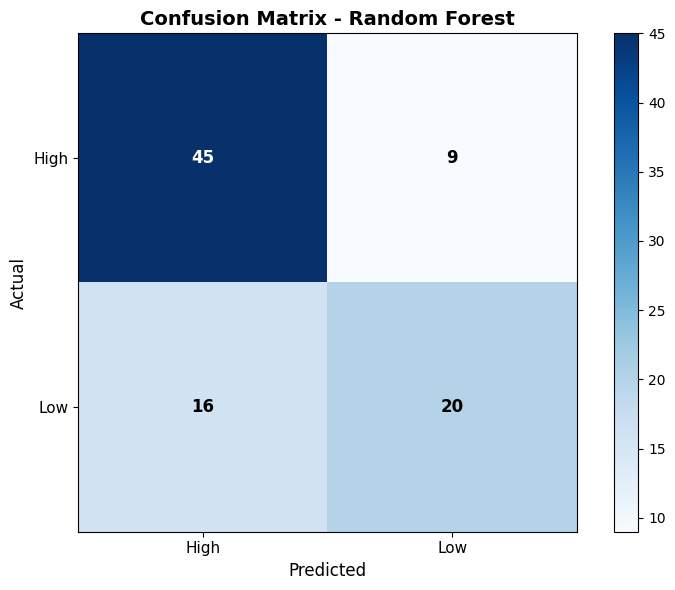

In [363]:
# Confusion matrix visualization
cm = confusion_matrix(y_test_class, y_pred_best)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title(f'Confusion Matrix - {best_class_model_name}', fontsize=14, fontweight='bold')
plt.colorbar()

classes = ['High', 'Low']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, fontsize=11)
plt.yticks(tick_marks, classes, fontsize=11)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black",
                fontsize=12, fontweight='bold')

plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

In [364]:
print("\nCLASSIFICATION ANALYSIS SUMMARY")
print(f"Total samples: {len(X_classification)}")
print(f"Training samples: {len(X_train_class)}")
print(f"Testing samples: {len(X_test_class)}")
print(f"Number of features: {X_classification.shape[1]}")
print(f"Number of classes: {len(classes)}")

print(f"\nBest Model: {best_class_model_name}")
print(f"Test Accuracy: {best_class_accuracy:.4f}")
print(f"F1 Score: {best_class_f1:.4f}")


CLASSIFICATION ANALYSIS SUMMARY
Total samples: 446
Training samples: 356
Testing samples: 90
Number of features: 11
Number of classes: 2

Best Model: Random Forest
Test Accuracy: 0.7222
F1 Score: 0.7826


## Regression Analysis
Predict mental health severity using three regression models with GridSearchCV and KFold cross-validation.

In [365]:
smmh_reg = pd.read_csv('smmh.csv')
smmh_reg = smmh_reg.rename(columns=new_column_names)

smmh_reg.head()

,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,...,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,compare_to_successful_people_scale,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [366]:
# Preprocessing

# Drop timestamp
smmh_reg = smmh_reg.drop(columns=['timestamp'])

# Remove whitespace
smmh_reg.columns = smmh_reg.columns.str.strip()
for col in smmh_reg.select_dtypes(include=['object']).columns:
    smmh_reg[col] = smmh_reg[col].str.strip()

# Standardize gender entries
smmh_reg = smmh_reg.replace({
    "gender": {
        "Nonbinary": "Non-binary",
        "NB": "Non-binary",
        "Non binary": "Non-binary",
    }
})
smmh_reg = smmh_reg[(smmh_reg["gender"] != "There are others???") & (smmh_reg["gender"] != "unsure")]

# Standardize frequency scales (convert 1-5 to 0-4)
frequency_cols = [
    'frequency_social_media_no_purpose',
    'frequency_social_media_distracted',
    'restless_without_social_media',
    'distractibility_scale',
    'worry_level_scale',
    'difficulty_concentrating',
    'compare_to_successful_people_scale',
    'frequency_seeking_validation',
    'frequency_feeling_depressed',
    'interest_fluctuation_scale',
    'sleep_issues_scale'
]

for col in frequency_cols:
    smmh_reg[col] = smmh_reg[col] - 1

# Reverse feelings_about_comparisons
smmh_reg['feelings_about_comparisons'] = 5 - smmh_reg['feelings_about_comparisons'] - 1

# Handle missing values and duplicates
smmh_reg = smmh_reg.dropna()
smmh_reg = smmh_reg.drop_duplicates()

# Remove Non-binary gender for consistency
smmh_reg = smmh_reg[smmh_reg['gender'] != 'Non-binary']

print(f"After preprocessing: {smmh_reg.shape}")

After preprocessing: (446, 20)


In [367]:
# Calculate mental health severity (target variable)
adhd_severity = (
    smmh_reg['frequency_social_media_no_purpose'] +
    smmh_reg['frequency_social_media_distracted'] +
    smmh_reg['distractibility_scale'] +
    smmh_reg['difficulty_concentrating']
) / 4

anxiety_severity = (
    smmh_reg['restless_without_social_media'] +
    smmh_reg['worry_level_scale']
) / 2

self_esteem_severity = (
    smmh_reg['compare_to_successful_people_scale'] +
    smmh_reg['feelings_about_comparisons'] +
    smmh_reg['frequency_seeking_validation']
) / 3

depression_severity = (
    smmh_reg['frequency_feeling_depressed'] +
    smmh_reg['interest_fluctuation_scale'] +
    smmh_reg['sleep_issues_scale']
) / 3

smmh_reg['mental_health_severity'] = (
    adhd_severity +
    anxiety_severity +
    self_esteem_severity +
    depression_severity
)

# Drop individual severity components

smmh_reg = smmh_reg.drop(columns=[
	'frequency_social_media_no_purpose',
	'frequency_social_media_distracted',
	'distractibility_scale',
	'difficulty_concentrating',
	'restless_without_social_media',
	'worry_level_scale',
	'compare_to_successful_people_scale',
	'feelings_about_comparisons',
	'frequency_seeking_validation',
	'frequency_feeling_depressed',
	'interest_fluctuation_scale',
	'sleep_issues_scale'
])

print(f"Mental health severity - Min: {smmh_reg['mental_health_severity'].min():.2f}, Max: {smmh_reg['mental_health_severity'].max():.2f}, Mean: {smmh_reg['mental_health_severity'].mean():.2f}")

Mental health severity - Min: 1.00, Max: 15.33, Mean: 8.15


In [368]:
# Prepare features for regression
# Keep individual mental health indicators as features (they are predictive)
# Also keep demographics and usage patterns

# One-hot encode categorical variables
# Split social media platforms
platform_dummies = smmh_reg['social_media_platforms'].str.get_dummies(sep=', ')
smmh_reg = smmh_reg.join(platform_dummies)
smmh_reg = smmh_reg.drop(columns=['social_media_platforms'])

# One-hot encode affiliated organizations
affiliated_org_dummies = smmh_reg['affiliated_organizations'].str.get_dummies(sep=', ')
if 'N/A' in affiliated_org_dummies.columns:
    affiliated_org_dummies = affiliated_org_dummies.drop(columns=['N/A'])
smmh_reg = smmh_reg.join(affiliated_org_dummies)
smmh_reg = smmh_reg.drop(columns=['affiliated_organizations'])

# One-hot encode occupation_status
smmh_reg['occupation_status'] = smmh_reg['occupation_status'].replace({
    'University Student': 'University',
    'School Student': 'School'
})
occupation_dummies = smmh_reg['occupation_status'].str.get_dummies()
smmh_reg = smmh_reg.join(occupation_dummies, rsuffix='_new')
for col in ['School', 'University']:
    if f'{col}_new' in smmh_reg.columns:
        smmh_reg[col] = smmh_reg[f'{col}_new']
        smmh_reg = smmh_reg.drop(columns=[f'{col}_new'])
smmh_reg = smmh_reg.drop(columns=['occupation_status'])

# Map daily social media time to numeric
time_mapping = {
    'Less than an Hour': 0,
    'Between 1 and 2 hours': 1,
    'Between 2 and 3 hours': 2,
    'Between 3 and 4 hours': 3,
    'Between 4 and 5 hours': 4,
    'More than 5 hours': 5
}
smmh_reg['daily_social_media_time'] = smmh_reg['daily_social_media_time'].map(time_mapping).astype(int)

# Map use_social_media to binary
smmh_reg['use_social_media'] = smmh_reg['use_social_media'].map({'Yes': 1, 'No': 0})

# Encode gender (Male: 0, Female: 1)
gender_mapping = {"Male": 0, "Female": 1}
smmh_reg['gender'] = smmh_reg['gender'].map(gender_mapping)

# Encode relationship_status
relationship_map = {
    "Married": 0,
    "Divorced": 1,
    "In a relationship": 2,
    "Single": 3
}
smmh_reg['relationship_status'] = smmh_reg['relationship_status'].map(relationship_map)

# Convert age to integer
smmh_reg['age'] = smmh_reg['age'].astype(int)

print(f"Final dataset shape: {smmh_reg.shape}")
print(f"Features: {smmh_reg.columns.tolist()}")

Final dataset shape: (446, 22)
Features: ['age', 'gender', 'relationship_status', 'use_social_media', 'daily_social_media_time', 'mental_health_severity', 'Discord', 'Facebook', 'Instagram', 'Pinterest', 'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube', 'Company', 'Goverment', 'Private', 'School', 'University', 'Retired', 'Salaried Worker']


In [369]:
# Separate features and target
X_regression = smmh_reg.drop(columns=['mental_health_severity'])
y_regression = smmh_reg['mental_health_severity']

print(f"Features shape: {X_regression.shape}")
print(f"Target shape: {y_regression.shape}")
print(f"\nFeature columns:")
for i, col in enumerate(X_regression.columns, 1):
    print(f"  {i}. {col}")

Features shape: (446, 21)
Target shape: (446,)

Feature columns:
  1. age
  2. gender
  3. relationship_status
  4. use_social_media
  5. daily_social_media_time
  6. Discord
  7. Facebook
  8. Instagram
  9. Pinterest
  10. Reddit
  11. Snapchat
  12. TikTok
  13. Twitter
  14. YouTube
  15. Company
  16. Goverment
  17. Private
  18. School
  19. University
  20. Retired
  21. Salaried Worker


In [370]:
# Import regression models and tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [371]:
# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Scale the features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"Training set: {X_train_reg_scaled.shape}")
print(f"Testing set: {X_test_reg_scaled.shape}")
print(f"Training target range: {y_train_reg.min():.2f} - {y_train_reg.max():.2f}")
print(f"Testing target range: {y_test_reg.min():.2f} - {y_test_reg.max():.2f}")

Training set: (356, 21)
Testing set: (90, 21)
Training target range: 1.00 - 15.08
Testing target range: 1.00 - 15.33


### Regression Models with GridSearchCV and KFold Cross-Validation

In [372]:
# Setup KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models and their parameter grids
models_config = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5],
            'subsample': [0.8, 1.0]
        }
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.01, 0.1, 0.5],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Train all models with GridSearchCV
trained_models = {}
results = []

for model_name, config in models_config.items():
    print(f"\nTraining {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=kfold,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_reg_scaled, y_train_reg)
    
    # Store trained model
    trained_models[model_name] = grid_search
    
    # Evaluate on test set
    y_pred = grid_search.best_estimator_.predict(X_test_reg_scaled)
    r2 = r2_score(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    mae = mean_absolute_error(y_test_reg, y_pred)
    
    # Store results
    results.append({
        'Model': model_name,
        'R² Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Best Parameters': grid_search.best_params_
    })
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.4f}")
    print(f"Test Set Performance: R²={r2:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}")

# Create results DataFrame
regression_results = pd.DataFrame(results)

# Store individual predictions for later use
rf_grid = trained_models['Random Forest']
gb_grid = trained_models['Gradient Boosting']
svr_grid = trained_models['Support Vector Regressor']

y_pred_rf = rf_grid.best_estimator_.predict(X_test_reg_scaled)
y_pred_gb = gb_grid.best_estimator_.predict(X_test_reg_scaled)
y_pred_svr = svr_grid.best_estimator_.predict(X_test_reg_scaled)

rf_r2, gb_r2, svr_r2 = regression_results['R² Score'].values
rf_rmse, gb_rmse, svr_rmse = regression_results['RMSE'].values
rf_mae, gb_mae, svr_mae = regression_results['MAE'].values


Training Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best CV RMSE: 2.7111
Test Set Performance: R²=0.1910, RMSE=2.7077, MAE=2.1154

Training Gradient Boosting...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best CV RMSE: 2.7111
Test Set Performance: R²=0.1910, RMSE=2.7077, MAE=2.1154

Training Gradient Boosting...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.8}
Best CV RMSE: 2.6912
Test Set Performance: R²=0.2075, RMSE=2.6800, MAE=2.0980

Training Support Vector Regressor...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min

### Model Comparison and Results

In [373]:
# Display comprehensive comparison table
print("\nModel Comparison - Test Set Performance:")
print(regression_results.to_string(index=False))

# Identify best model
best_model_idx = regression_results['R² Score'].idxmax()
best_model_name = regression_results.loc[best_model_idx, 'Model']
best_r2 = regression_results.loc[best_model_idx, 'R² Score']
best_rmse = regression_results.loc[best_model_idx, 'RMSE']
best_mae = regression_results.loc[best_model_idx, 'MAE']

print(f"\nBest Model: {best_model_name}")
print(f"R² Score: {best_r2:.4f}")
print(f"RMSE: {best_rmse:.4f}")
print(f"MAE: {best_mae:.4f}")

# Get best model object for feature importance
best_model_obj = trained_models[best_model_name].best_estimator_


Model Comparison - Test Set Performance:
                   Model  R² Score     RMSE      MAE                                                                                        Best Parameters
           Random Forest  0.191039 2.707673 2.115397                 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
       Gradient Boosting  0.207485 2.680007 2.097964 {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.8}
Support Vector Regressor  0.161970 2.755891 2.206500                                             {'C': 1, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}

Best Model: Gradient Boosting
R² Score: 0.2075
RMSE: 2.6800
MAE: 2.0980


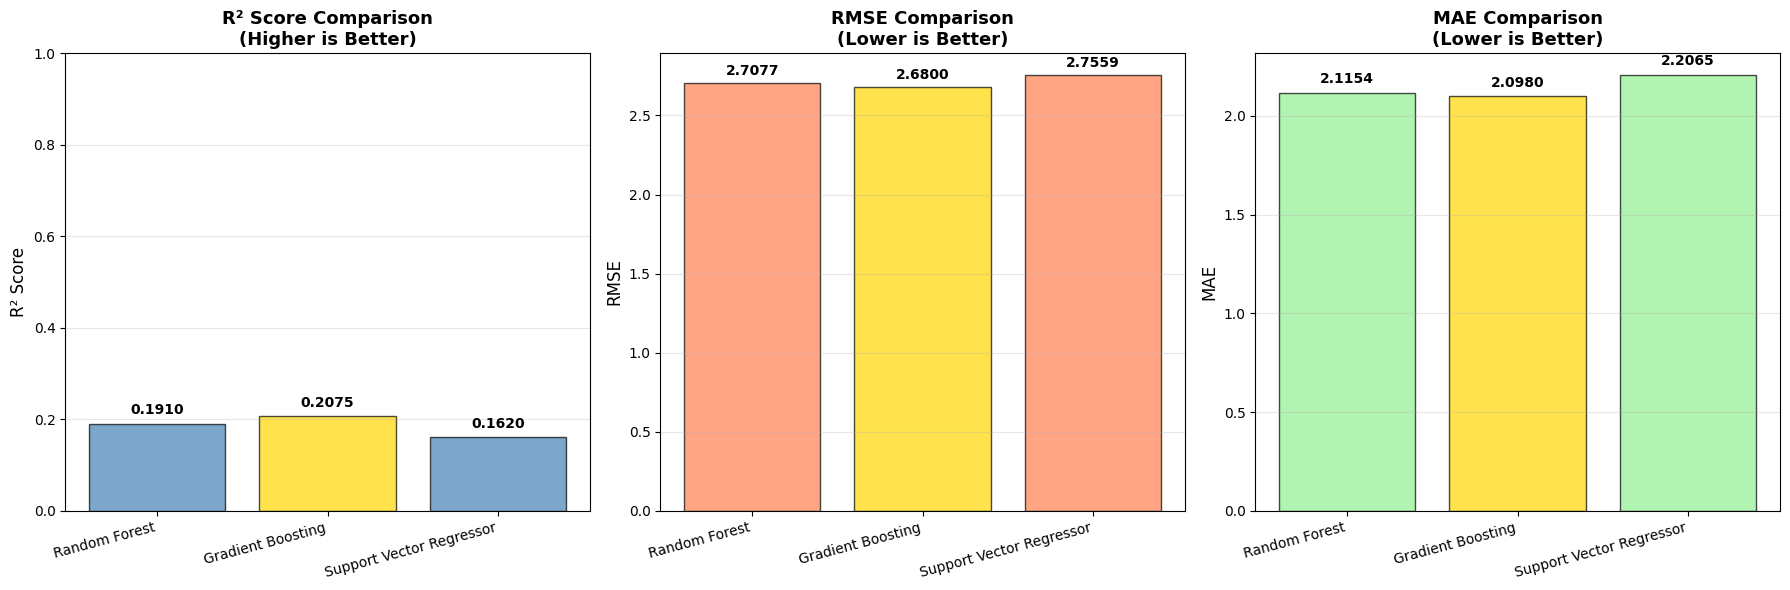

In [374]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = regression_results['Model'].values
r2_scores = regression_results['R² Score'].values
rmse_scores = regression_results['RMSE'].values
mae_scores = regression_results['MAE'].values

# R² Score comparison
colors = ['gold' if model == best_model_name else 'steelblue' for model in models]
axes[0].bar(range(len(models)), r2_scores, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=15, ha='right')
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score Comparison\n(Higher is Better)', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(r2_scores):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=10, fontweight='bold')

# RMSE comparison
colors = ['gold' if model == best_model_name else 'coral' for model in models]
axes[1].bar(range(len(models)), rmse_scores, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=15, ha='right')
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('RMSE Comparison\n(Lower is Better)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(rmse_scores):
    axes[1].text(i, v + 0.05, f'{v:.4f}', ha='center', fontsize=10, fontweight='bold')

# MAE comparison
colors = ['gold' if model == best_model_name else 'lightgreen' for model in models]
axes[2].bar(range(len(models)), mae_scores, color=colors, alpha=0.7, edgecolor='black')
axes[2].set_xticks(range(len(models)))
axes[2].set_xticklabels(models, rotation=15, ha='right')
axes[2].set_ylabel('MAE', fontsize=12)
axes[2].set_title('MAE Comparison\n(Lower is Better)', fontsize=13, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(mae_scores):
    axes[2].text(i, v + 0.05, f'{v:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

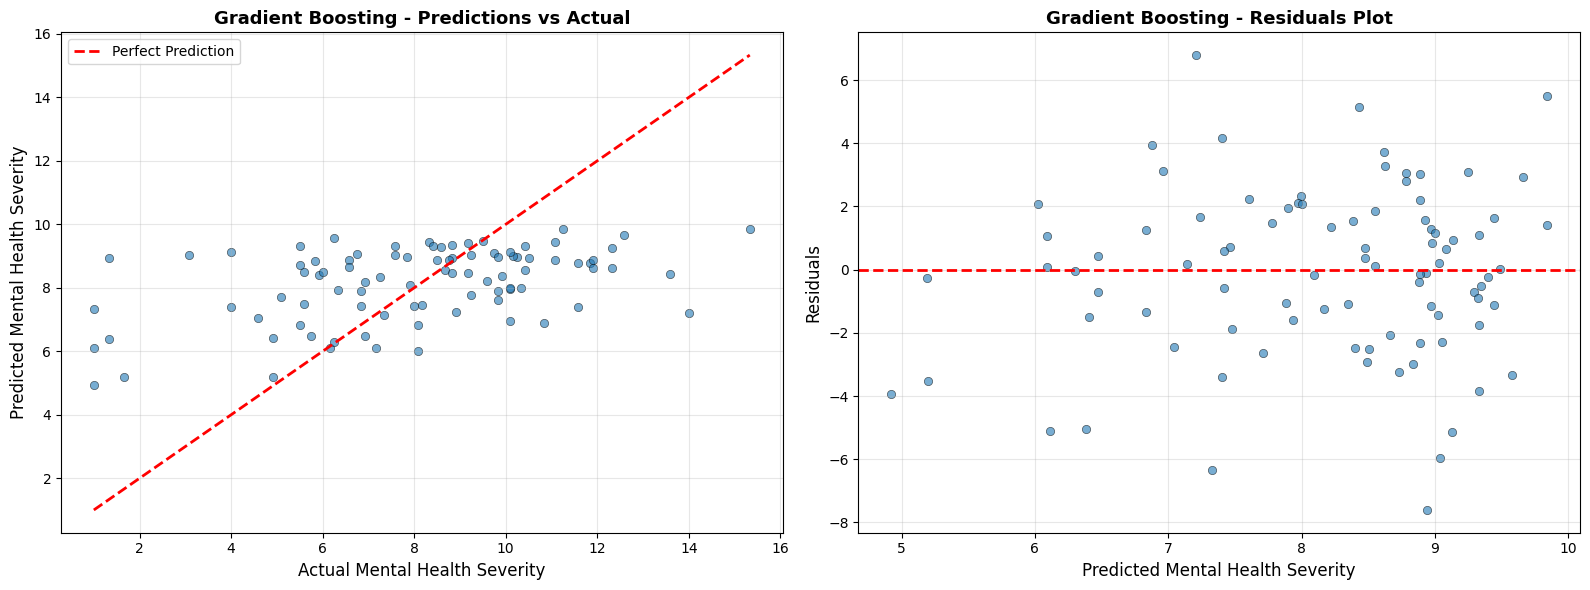

In [375]:
# Predictions vs Actual plot for the best model
if best_model_name == 'Random Forest':
    best_predictions = y_pred_rf
    best_model_obj = rf_grid.best_estimator_
elif best_model_name == 'Gradient Boosting':
    best_predictions = y_pred_gb
    best_model_obj = gb_grid.best_estimator_
else:
    best_predictions = y_pred_svr
    best_model_obj = svr_grid.best_estimator_

# Create predictions vs actual plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(y_test_reg, best_predictions, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Mental Health Severity', fontsize=12)
axes[0].set_ylabel('Predicted Mental Health Severity', fontsize=12)
axes[0].set_title(f'{best_model_name} - Predictions vs Actual', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y_test_reg - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Mental Health Severity', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title(f'{best_model_name} - Residuals Plot', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Top 15 Most Important Features - Gradient Boosting:
                Feature  Importance
daily_social_media_time    0.449707
                    age    0.250435
             University    0.049223
        Salaried Worker    0.040374
                 TikTok    0.032328
               Snapchat    0.032309
              Pinterest    0.022233
                Twitter    0.016803
               Facebook    0.016761
    relationship_status    0.015898
                Discord    0.011948
                 Reddit    0.010485
                Company    0.009429
              Goverment    0.008904
                 gender    0.007860


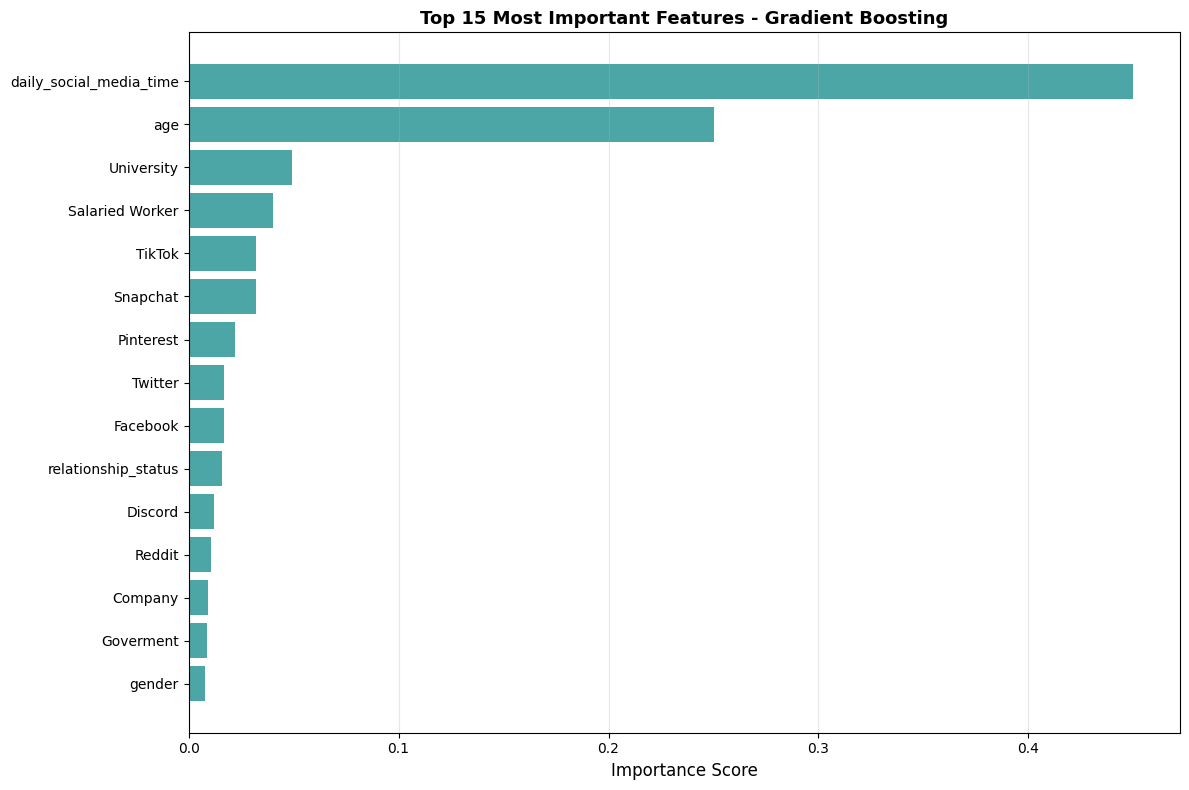

In [376]:
# Feature importance for the best model (if applicable)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importances = best_model_obj.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_regression.columns,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 15 Most Important Features - {best_model_name}:")
    print(feature_importance_df.head(15).to_string(index=False))
    
    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='teal', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)
    plt.xlabel('Importance Score', fontsize=12)
    plt.title(f'Top 15 Most Important Features - {best_model_name}', fontsize=13, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"\n{best_model_name} does not provide feature importance scores.")

In [377]:
# Cross-validation scores for all models
print("\nCross-Validation Performance (5-Fold):")

models_pred = [
    ('Random Forest', rf_grid.best_estimator_),
    ('Gradient Boosting', gb_grid.best_estimator_),
    ('Support Vector Regressor', svr_grid.best_estimator_)
]

cv_results = []
for model_name, model in models_pred:
    cv_scores = cross_val_score(model, X_train_reg_scaled, y_train_reg, 
                                 cv=kfold, scoring='r2')
    cv_rmse = np.sqrt(-cross_val_score(model, X_train_reg_scaled, y_train_reg,
                                        cv=kfold, scoring='neg_mean_squared_error'))
    
    print(f"\n{model_name}:")
    print(f"  Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Mean RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")
    
    cv_results.append({
        'Model': model_name,
        'Mean R²': cv_scores.mean(),
        'Std R²': cv_scores.std(),
        'Mean RMSE': cv_rmse.mean(),
        'Std RMSE': cv_rmse.std()
    })


Cross-Validation Performance (5-Fold):

Random Forest:
  Mean R²: 0.1971 (+/- 0.3780)
  Mean RMSE: 2.6912 (+/- 0.6558)

Random Forest:
  Mean R²: 0.1971 (+/- 0.3780)
  Mean RMSE: 2.6912 (+/- 0.6558)

Gradient Boosting:
  Mean R²: 0.2088 (+/- 0.2803)
  Mean RMSE: 2.6794 (+/- 0.5037)

Support Vector Regressor:
  Mean R²: 0.2172 (+/- 0.2864)
  Mean RMSE: 2.6656 (+/- 0.5368)

Gradient Boosting:
  Mean R²: 0.2088 (+/- 0.2803)
  Mean RMSE: 2.6794 (+/- 0.5037)

Support Vector Regressor:
  Mean R²: 0.2172 (+/- 0.2864)
  Mean RMSE: 2.6656 (+/- 0.5368)


In [378]:
print("\nPART 3: REGRESSION ANALYSIS SUMMARY")
print(f"Total samples: {len(X_regression)}")
print(f"Training samples: {len(X_train_reg)}")
print(f"Testing samples: {len(X_test_reg)}")
print(f"Number of features: {X_regression.shape[1]}")

print(f"\nBest Model: {best_model_name}")
print(f"R² Score: {best_r2:.4f}")
print(f"RMSE: {best_rmse:.4f}")
print(f"MAE: {best_mae:.4f}")


PART 3: REGRESSION ANALYSIS SUMMARY
Total samples: 446
Training samples: 356
Testing samples: 90
Number of features: 21

Best Model: Gradient Boosting
R² Score: 0.2075
RMSE: 2.6800
MAE: 2.0980
